In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import pyarrow.parquet as pa


from sklearn.dummy import DummyRegressor
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder


In [104]:

train = pd.read_csv('train.csv')

test = pd.read_csv('test.csv')

dictionary = pd.read_csv('data_dictionary.csv')

train

id Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
0     00008ff9                      Fall                5                0   
1     000fd460                    Summer                9                0   
2     00105258                    Summer               10                1   
3     00115b9f                    Winter                9                0   
4     0016bb22                    Spring               18                1   
...        ...                       ...              ...              ...   
3955  ff8a2de4                      Fall               13                0   
3956  ffa9794a                    Winter               10                0   
3957  ffcd4dbd                      Fall               11                0   
3958  ffed1dd5                    Spring               13                0   
3959  ffef538e                    Spring               11                0   

     CGAS-Season  CGAS-CGAS_Score Physical-Season  Physical-BMI  \
0         Winter             51.0            Fall     16.877316   
1            NaN              NaN            Fall     14.035590   
2           Fall             71.0            Fall     16.648696   
3           Fall             71.0          Summer     18.292347   
4         Summer              NaN             NaN           NaN   
...          ...              ...             ...           ...   
3955      Spring             60.0            Fall     16.362460   
3956         NaN              NaN          Spring     18.764678   
3957      Spring             68.0          Winter     21.441500   
3958      Spring             70.0          Winter     12.235895   
3959         NaN              NaN          Winter           NaN   

      Physical-Height  Physical-Weight  ...  PCIAT-PCIAT_18  PCIAT-PCIAT_19  \
0                46.0             50.8  ...             4.0             2.0   
1                48.0             46.0  ...             0.0             0.0   
2                56.5             75.6  ...             2.0             1.0   
3                56.0             81.6  ...             3.0             4.0   
4                 NaN              NaN  ...             NaN             NaN   
...               ...              ...  ...             ...             ...   
3955             59.5             82.4  ...             1.0             1.0   
3956             53.5             76.4  ...             NaN             NaN   
3957             60.0            109.8  ...             1.0             0.0   
3958             70.7             87.0  ...             1.0             1.0   
3959              NaN              NaN  ...             NaN             NaN   

      PCIAT-PCIAT_20  PCIAT-PCIAT_Total SDS-Season  SDS-SDS_Total_Raw  \
0                4.0               55.0        NaN                NaN   
1                0.0                0.0       Fall               46.0   
2                1.0               28.0       Fall               38.0   
3                1.0               44.0     Summer               31.0   
4                NaN                NaN        NaN                NaN   
...              ...                ...        ...                ...   
3955             0.0               32.0     Winter               35.0   
3956             NaN                NaN        NaN                NaN   
3957             1.0               31.0     Winter               56.0   
3958             1.0               19.0     Spring               33.0   
3959             NaN                NaN        NaN                NaN   

      SDS-SDS_Total_T  PreInt_EduHx-Season  \
0                 NaN                 Fall   
1                64.0               Summer   
2                54.0               Summer   
3                45.0               Winter   
4                 NaN                  NaN   
...               ...                  ...   
3955             50.0                 Fall   
3956              NaN               Winter   
3957             77.0         

In [105]:
categories_list = train.columns
print(categories_list)

Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST'

In [106]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

In [107]:
train.select_dtypes(include='object')

id Basic_Demos-Enroll_Season CGAS-Season Physical-Season  \
0     00008ff9                      Fall      Winter            Fall   
1     000fd460                    Summer         NaN            Fall   
2     00105258                    Summer        Fall            Fall   
3     00115b9f                    Winter        Fall          Summer   
4     0016bb22                    Spring      Summer             NaN   
...        ...                       ...         ...             ...   
3955  ff8a2de4                      Fall      Spring            Fall   
3956  ffa9794a                    Winter         NaN          Spring   
3957  ffcd4dbd                      Fall      Spring          Winter   
3958  ffed1dd5                    Spring      Spring          Winter   
3959  ffef538e                    Spring         NaN          Winter   

     Fitness_Endurance-Season FGC-Season BIA-Season PAQ_A-Season PAQ_C-Season  \
0                         NaN       Fall       Fall          NaN          NaN   
1                         NaN       Fall     Winter          NaN         Fall   
2                        Fall       Fall        NaN          NaN       Summer   
3                      Summer     Summer     Summer          NaN       Winter   
4                         NaN        NaN        NaN       Summer          NaN   
...                       ...        ...        ...          ...          ...   
3955                      NaN       Fall       Fall          NaN       Winter   
3956                      NaN     Spring     Spring          NaN       Winter   
3957                      NaN     Winter     Winter          NaN       Winter   
3958                      NaN     Spring     Summer          NaN       Spring   
3959                      NaN     Winter        NaN          NaN          NaN   

     PCIAT-Season SDS-Season PreInt_EduHx-Season  
0            Fall        NaN                Fall  
1            Fall       Fall              Summer  
2            Fall       Fall              Summer  
3          Summer     Summer              Winter  
4             NaN        NaN                 NaN  
...           ...        ...                 ...  
3955       Winter     Winter                Fall  
3956          NaN        NaN              Winter  
3957       Winter     Winter                Fall  
3958       Spring     Spring              Spring  
3959          NaN        NaN              Spring  

[3960 rows x 12 columns]

In [108]:
train.corr(numeric_only=True, method='pearson')

Basic_Demos-Age  Basic_Demos-Sex  \
Basic_Demos-Age                                1.000000         0.064004   
Basic_Demos-Sex                                0.064004         1.000000   
CGAS-CGAS_Score                               -0.009994         0.075470   
Physical-BMI                                   0.492112         0.025793   
Physical-Height                                0.880274        -0.014454   
...                                                 ...              ...   
PCIAT-PCIAT_Total                              0.409559        -0.093648   
SDS-SDS_Total_Raw                              0.037317        -0.020122   
SDS-SDS_Total_T                                0.037115        -0.018508   
PreInt_EduHx-computerinternet_hoursday         0.441822        -0.000579   
sii                                            0.365990        -0.100148   

                                        CGAS-CGAS_Score  Physical-BMI  \
Basic_Demos-Age                               -0.009994      0.492112   
Basic_Demos-Sex                                0.075470      0.025793   
CGAS-CGAS_Score                                1.000000     -0.094074   
Physical-BMI                                  -0.094074      1.000000   
Physical-Height                               -0.023185      0.487097   
...                                                 ...           ...   
PCIAT-PCIAT_Total                             -0.070542      0.240858   
SDS-SDS_Total_Raw                             -0.145369      0.087655   
SDS-SDS_Total_T                               -0.148457      0.086185   
PreInt_EduHx-computerinternet_hoursday        -0.021596      0.296709   
sii                                           -0.085261      0.221125   

                                        Physical-Height  Physical-Weight  \
Basic_Demos-Age                                0.880274         0.748149   
Basic_Demos-Sex                               -0.014454         0.003245   
CGAS-CGAS_Score                               -0.023185        -0.076399   
Physical-BMI                                   0.487097         0.865662   
Physical-Height                                1.000000         0.833844   
...                                                 ...              ...   
PCIAT-PCIAT_Total                              0.420765         0.353048   
SDS-SDS_Total_Raw                              0.036687         0.075098   
SDS-SDS_Total_T                                0.036478         0.073482   
PreInt_EduHx-computerinternet_hoursday         0.399367         0.375851   
sii                                            0.373530         0.325938   

                                        Physical-Waist_Circumference  \
Basic_Demos-Age                                             0.609601   
Basic_Demos-Sex                                            -0.020013   
CGAS-CGAS_Score                                            -0.076116   
Physical-BMI                                                0.892149   
Physical-Height                                             0.688033   
...                                                              ...   
PCIAT-PCIAT_Total                                           0.327013   
SDS-SDS_Total_Raw                                           0.089831   
SDS-SDS_Total_T                                             0.091152   
PreInt_EduHx-computerinternet_hoursday                      0.371418   
sii                                                         0.272885   

                                        Physical-Diastolic_BP  \
Basic_Demos-Age                                      0.107960   
Basic_Demos-Sex                                      0.002076   
CGAS-CGAS_Score                                     -0.005292   
Physical-BMI                                         0.141795   
Physical-Height                                      0.115724   
...                                                       ...   
PCIAT-PCIAT_Total

The default method for corr is pearson's correlation measure, the simplest correlation measure and most common metric for correlation. 
1 denotes positive correlation, -1 denotes negative
The closer to 1 or -1 the correlation is, the stronger it is

In [109]:
train_corr = train.corr(numeric_only=True, method='spearman')

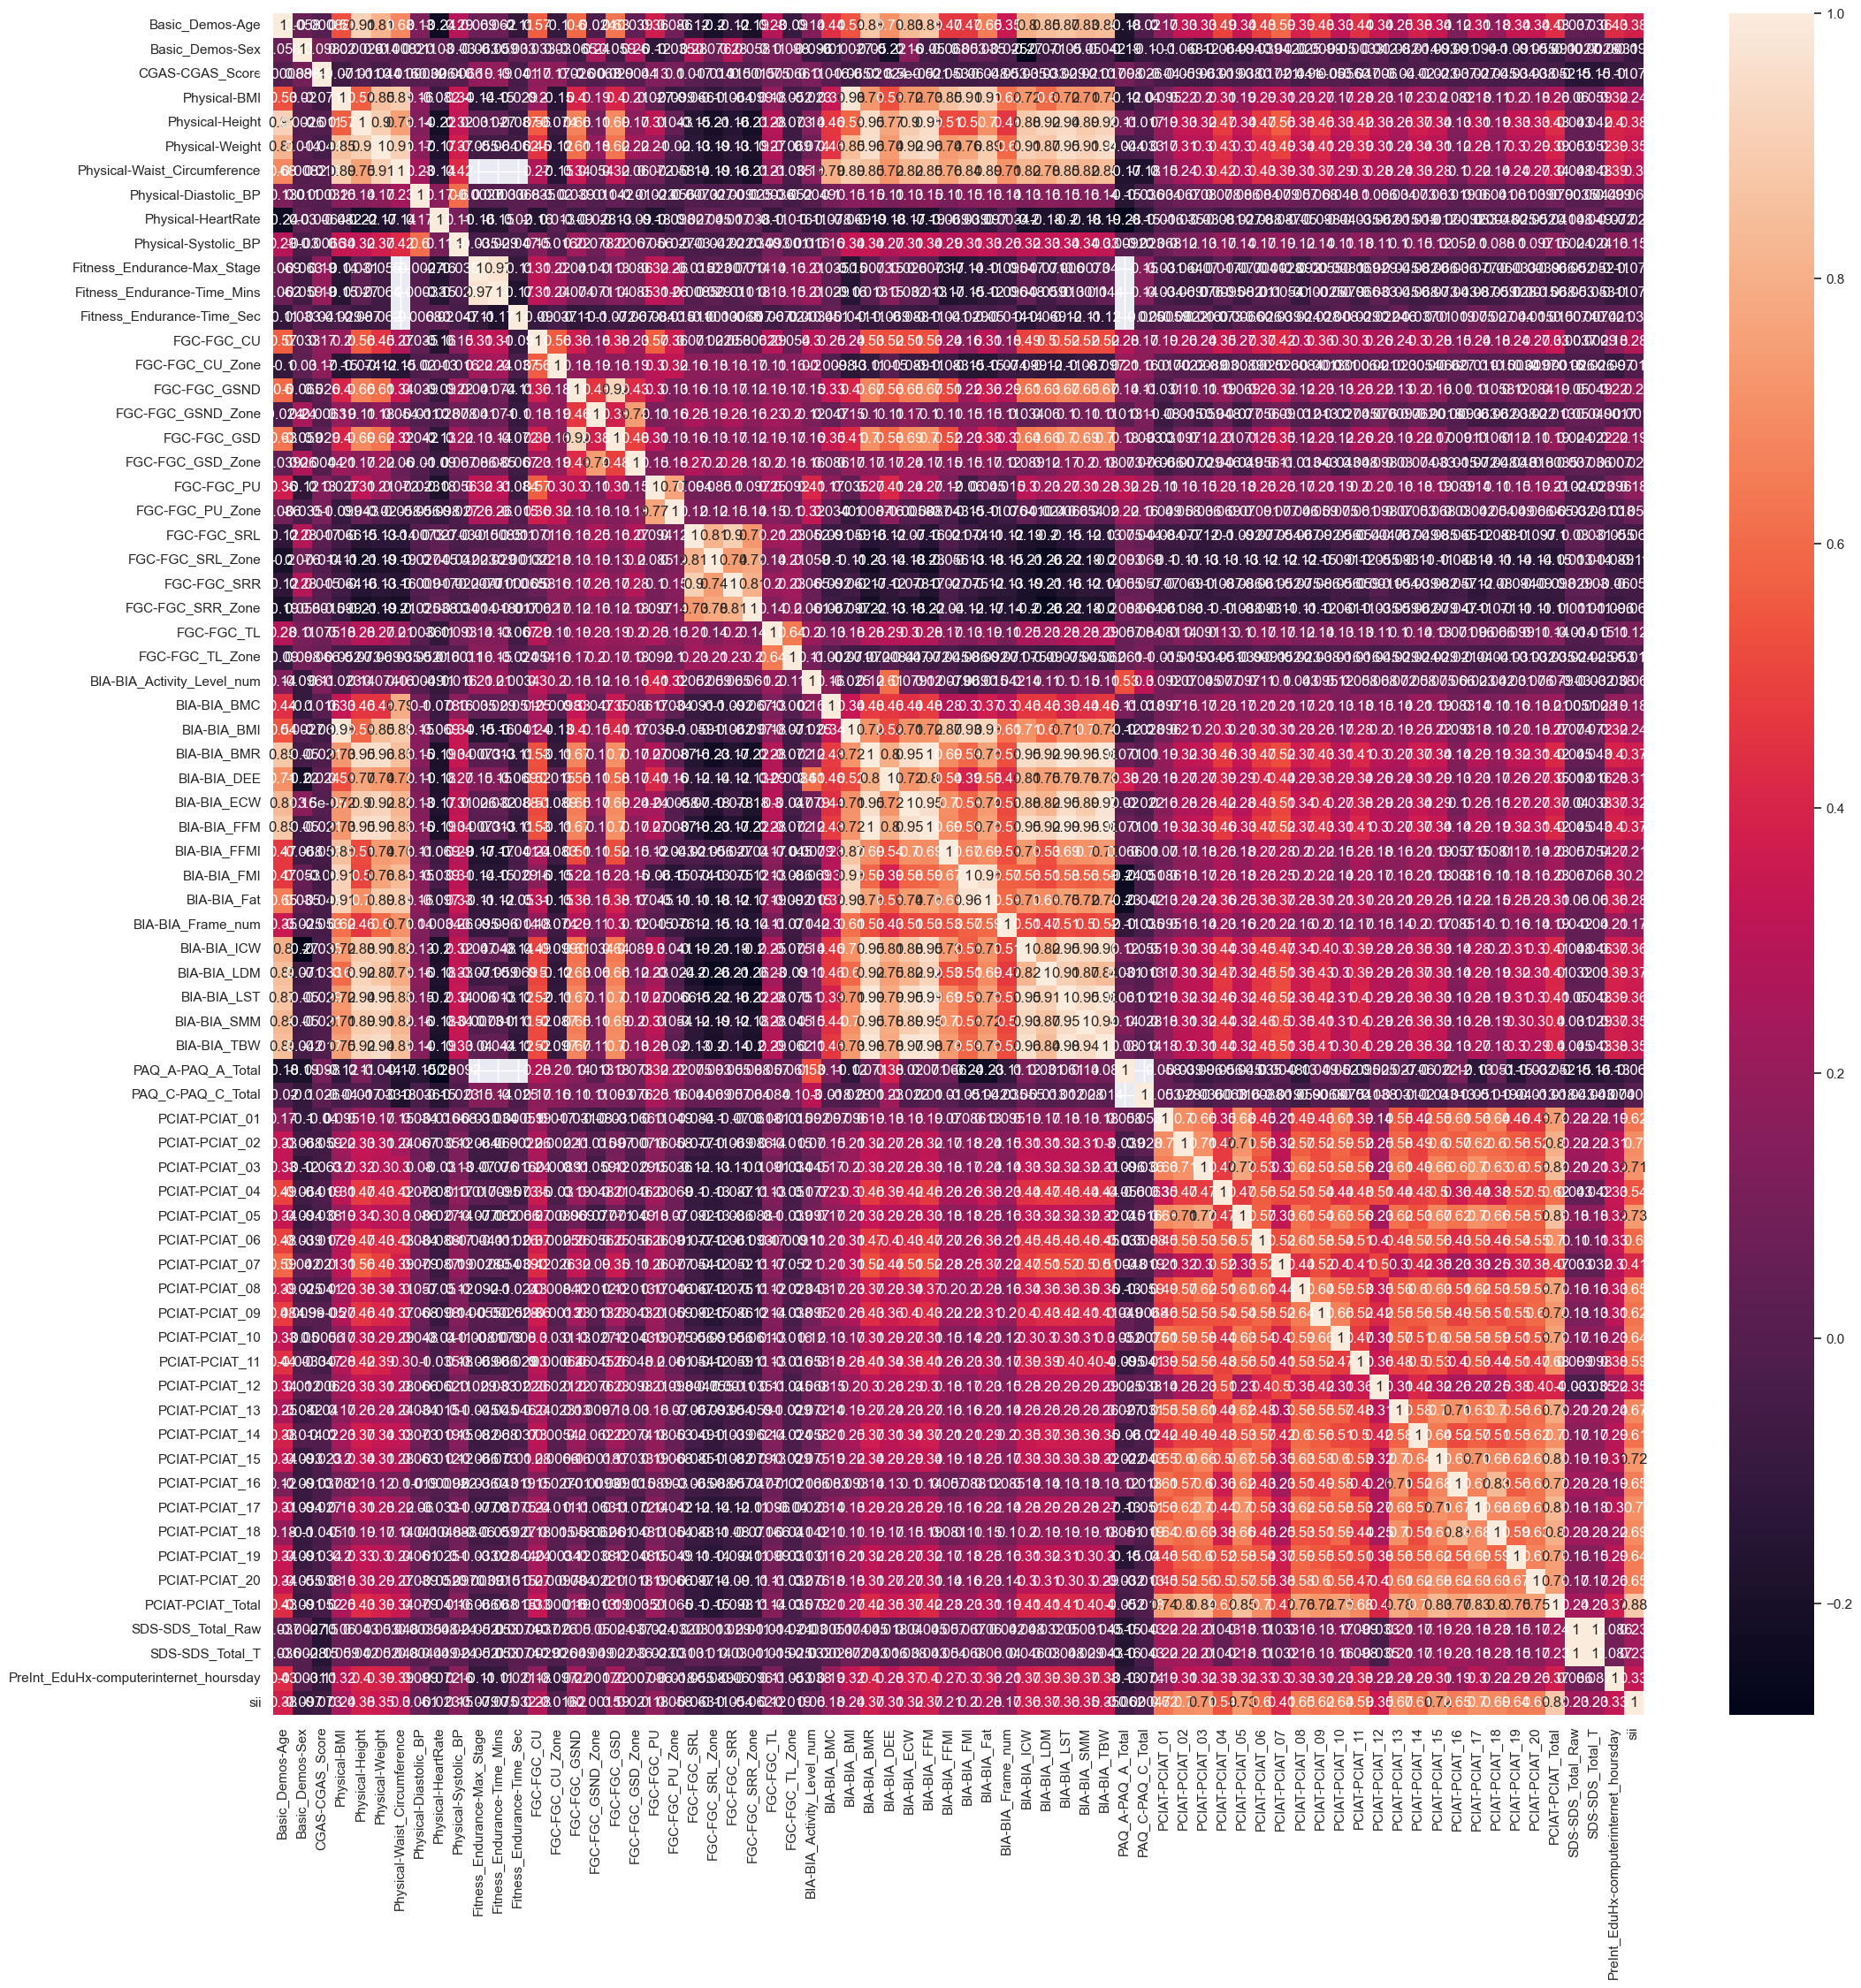

<Figure size 20000x20000 with 0 Axes>

In [153]:
sns.heatmap(train_corr, annot=True)
plt.figure(figsize=(200,200))
plt.show()

In [111]:
train.describe()

Basic_Demos-Age  Basic_Demos-Sex  CGAS-CGAS_Score  Physical-BMI  \
count      3960.000000      3960.000000      2421.000000   3022.000000   
mean         10.433586         0.372727        65.454771     19.331929   
std           3.574648         0.483591        22.341862      5.113934   
min           5.000000         0.000000        25.000000      0.000000   
25%           8.000000         0.000000        59.000000     15.869350   
50%          10.000000         0.000000        65.000000     17.937682   
75%          13.000000         1.000000        75.000000     21.571244   
max          22.000000         1.000000       999.000000     59.132048   

       Physical-Height  Physical-Weight  Physical-Waist_Circumference  \
count      3027.000000      3076.000000                    898.000000   
mean         55.946713        89.038615                     27.278508   
std           7.473764        44.569040                      5.567287   
min          33.000000         0.000000                     18.000000   
25%          50.000000        57.200000                     23.000000   
50%          55.000000        77.000000                     26.000000   
75%          62.000000       113.800000                     30.000000   
max          78.500000       315.000000                     50.000000   

       Physical-Diastolic_BP  Physical-HeartRate  Physical-Systolic_BP  ...  \
count            2954.000000         2967.000000           2954.000000  ...   
mean               69.648951           81.597236            116.983074  ...   
std                13.611226           13.665196             17.061225  ...   
min                 0.000000           27.000000              0.000000  ...   
25%                61.000000           72.000000            107.000000  ...   
50%                68.000000           81.000000            114.000000  ...   
75%                76.000000           90.500000            125.000000  ...   
max               179.000000          138.000000            203.000000  ...   

       PCIAT-PCIAT_16  PCIAT-PCIAT_17  PCIAT-PCIAT_18  PCIAT-PCIAT_19  \
count     2728.000000     2725.000000     2728.000000     2730.000000   
mean         1.452346        1.627890        1.613636        1.158974   
std          1.495600        1.445622        1.529178        1.343661   
min          0.000000        0.000000        0.000000        0.000000   
25%          0.000000        0.000000        0.000000        0.000000   
50%          1.000000        1.000000        1.000000        1.000000   
75%          2.000000        3.000000        2.000000        2.000000   
max          5.000000        5.000000        5.000000        5.000000   

       PCIAT-PCIAT_20  PCIAT-PCIAT_Total  SDS-SDS_Total_Raw  SDS-SDS_Total_T  \
count     2733.000000        2736.000000        2609.000000      2606.000000   
mean         0.943652          27.896199          41.088923        57.763622   
std          1.185460          20.338853          10.427433        13.196091   
min          0.000000           0.000000          17.000000        38.000000   
25%          0.000000          12.000000          33.000000        47.000000   
50%          1.000000          26.000000          39.000000        55.000000   
75%          1.000000          41.000000          46.000000        64.000000   
max          5.000000          93.000000          96.000000       100.000000   

       PreInt_EduHx-computerinternet_hoursday          sii  
count                             3301.000000  2736.000000  
mean                                 1.060588     0.580409  
std                                  1.094875     0.771122  
min                                  0.000000     0.000000  
25%                                  0.000000     0.000000  
50%                                  1.000000     0.000000  
75%                                  2.000000     1.000000  
max                                  3.000000     3.000000  

[8 rows x 70 columns]

In [112]:
missing_values = train.isnull().sum()
print(missing_values)

id                                           0
Basic_Demos-Enroll_Season                    0
Basic_Demos-Age                              0
Basic_Demos-Sex                              0
CGAS-Season                               1405
                                          ... 
SDS-SDS_Total_Raw                         1351
SDS-SDS_Total_T                           1354
PreInt_EduHx-Season                        420
PreInt_EduHx-computerinternet_hoursday     659
sii                                       1224
Length: 82, dtype: int64


In [113]:
train['sii'].count()

2736

In [114]:
ages = train.sort_values(by="Basic_Demos-Age",ascending=True)
print(ages)

            id Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
0     00008ff9                      Fall                5                0   
3628  ea401fc9                    Winter                5                0   
881   350cf38b                    Summer                5                0   
3600  e8313da5                    Winter                5                0   
859   3399795b                      Fall                5                0   
...        ...                       ...              ...              ...   
1298  50a90725                      Fall               22                1   
2048  81e9a24a                    Summer               22                1   
2345  940b2f17                    Spring               22                1   
997   3cb2c4da                    Spring               22                0   
1602  653f46e1                    Summer               22                1   

     CGAS-Season  CGAS-CGAS_Score Physical-Season  Physical-BMI

<Figure size 1000x600 with 0 Axes>

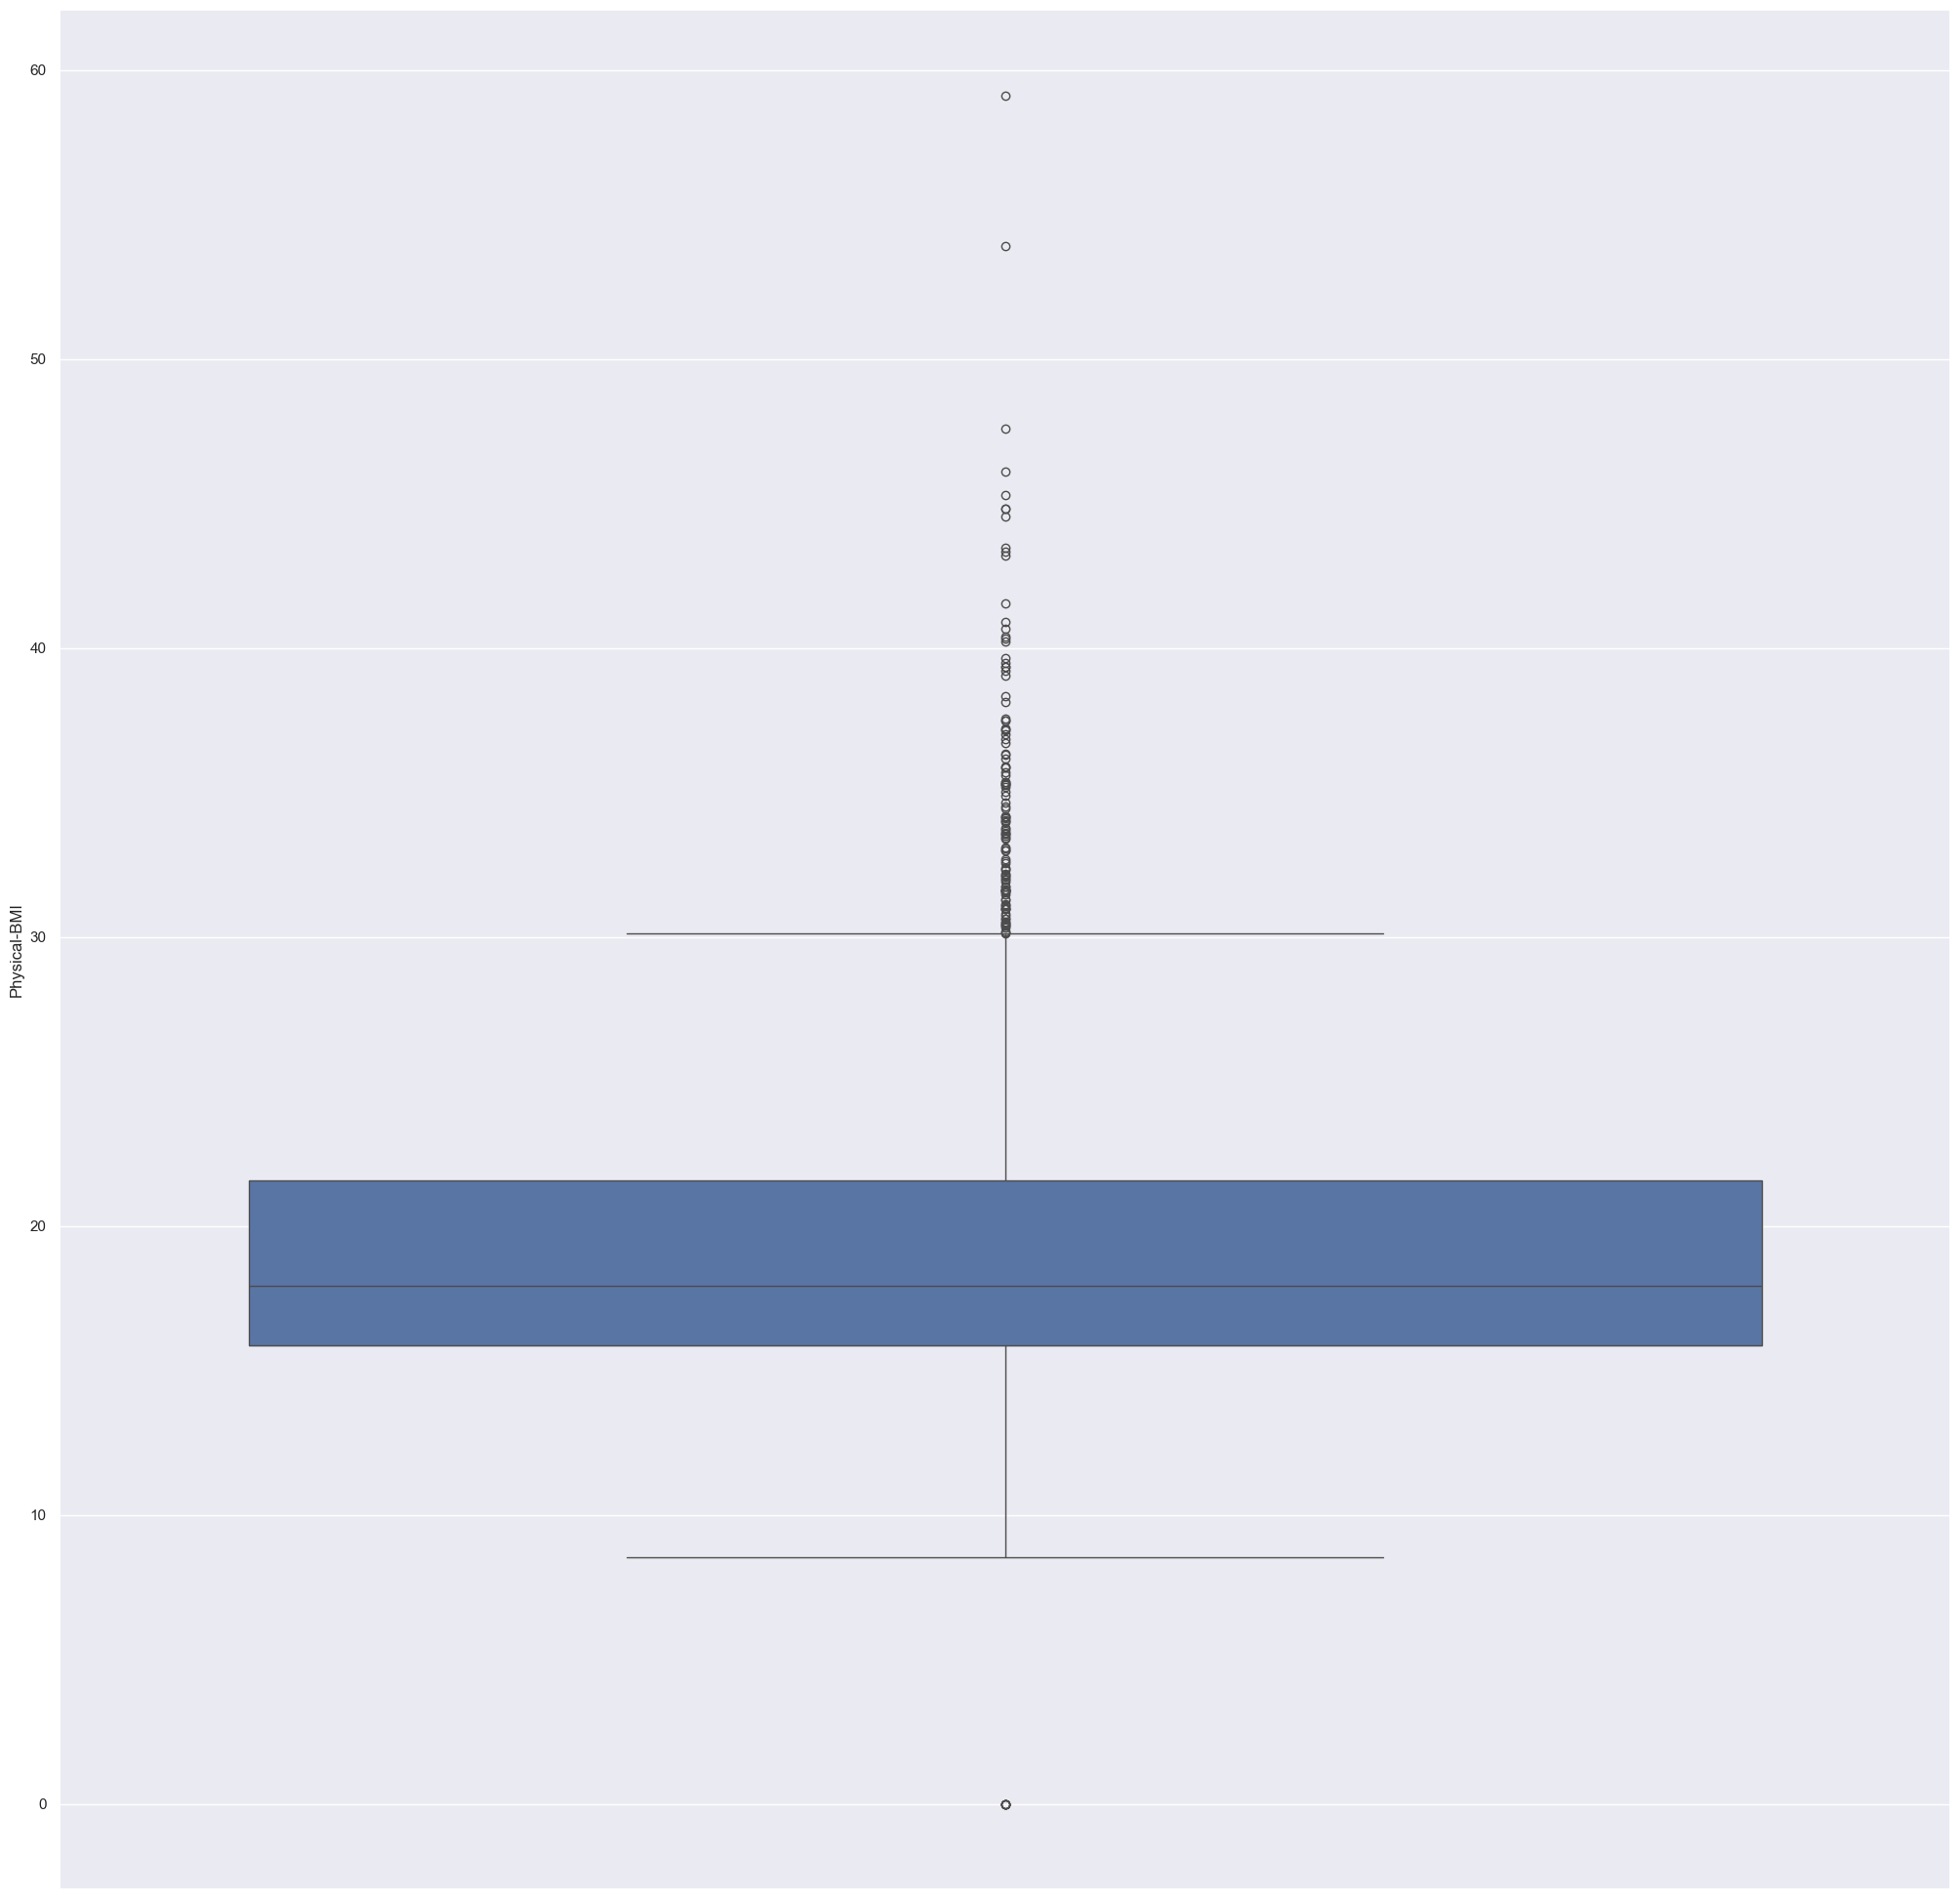

<Figure size 1000x600 with 0 Axes>

In [115]:

sns.set(rc={"figure.figsize":(25,25)})
sns.boxplot(train['Physical-BMI'])
plt.figure(figsize=(10,6))

A BMI of 0 is impossible, this plot shows that these values either need to be deleted or adjusted. Quite a few outliers can be seen here as well.

<Figure size 1000x600 with 0 Axes>

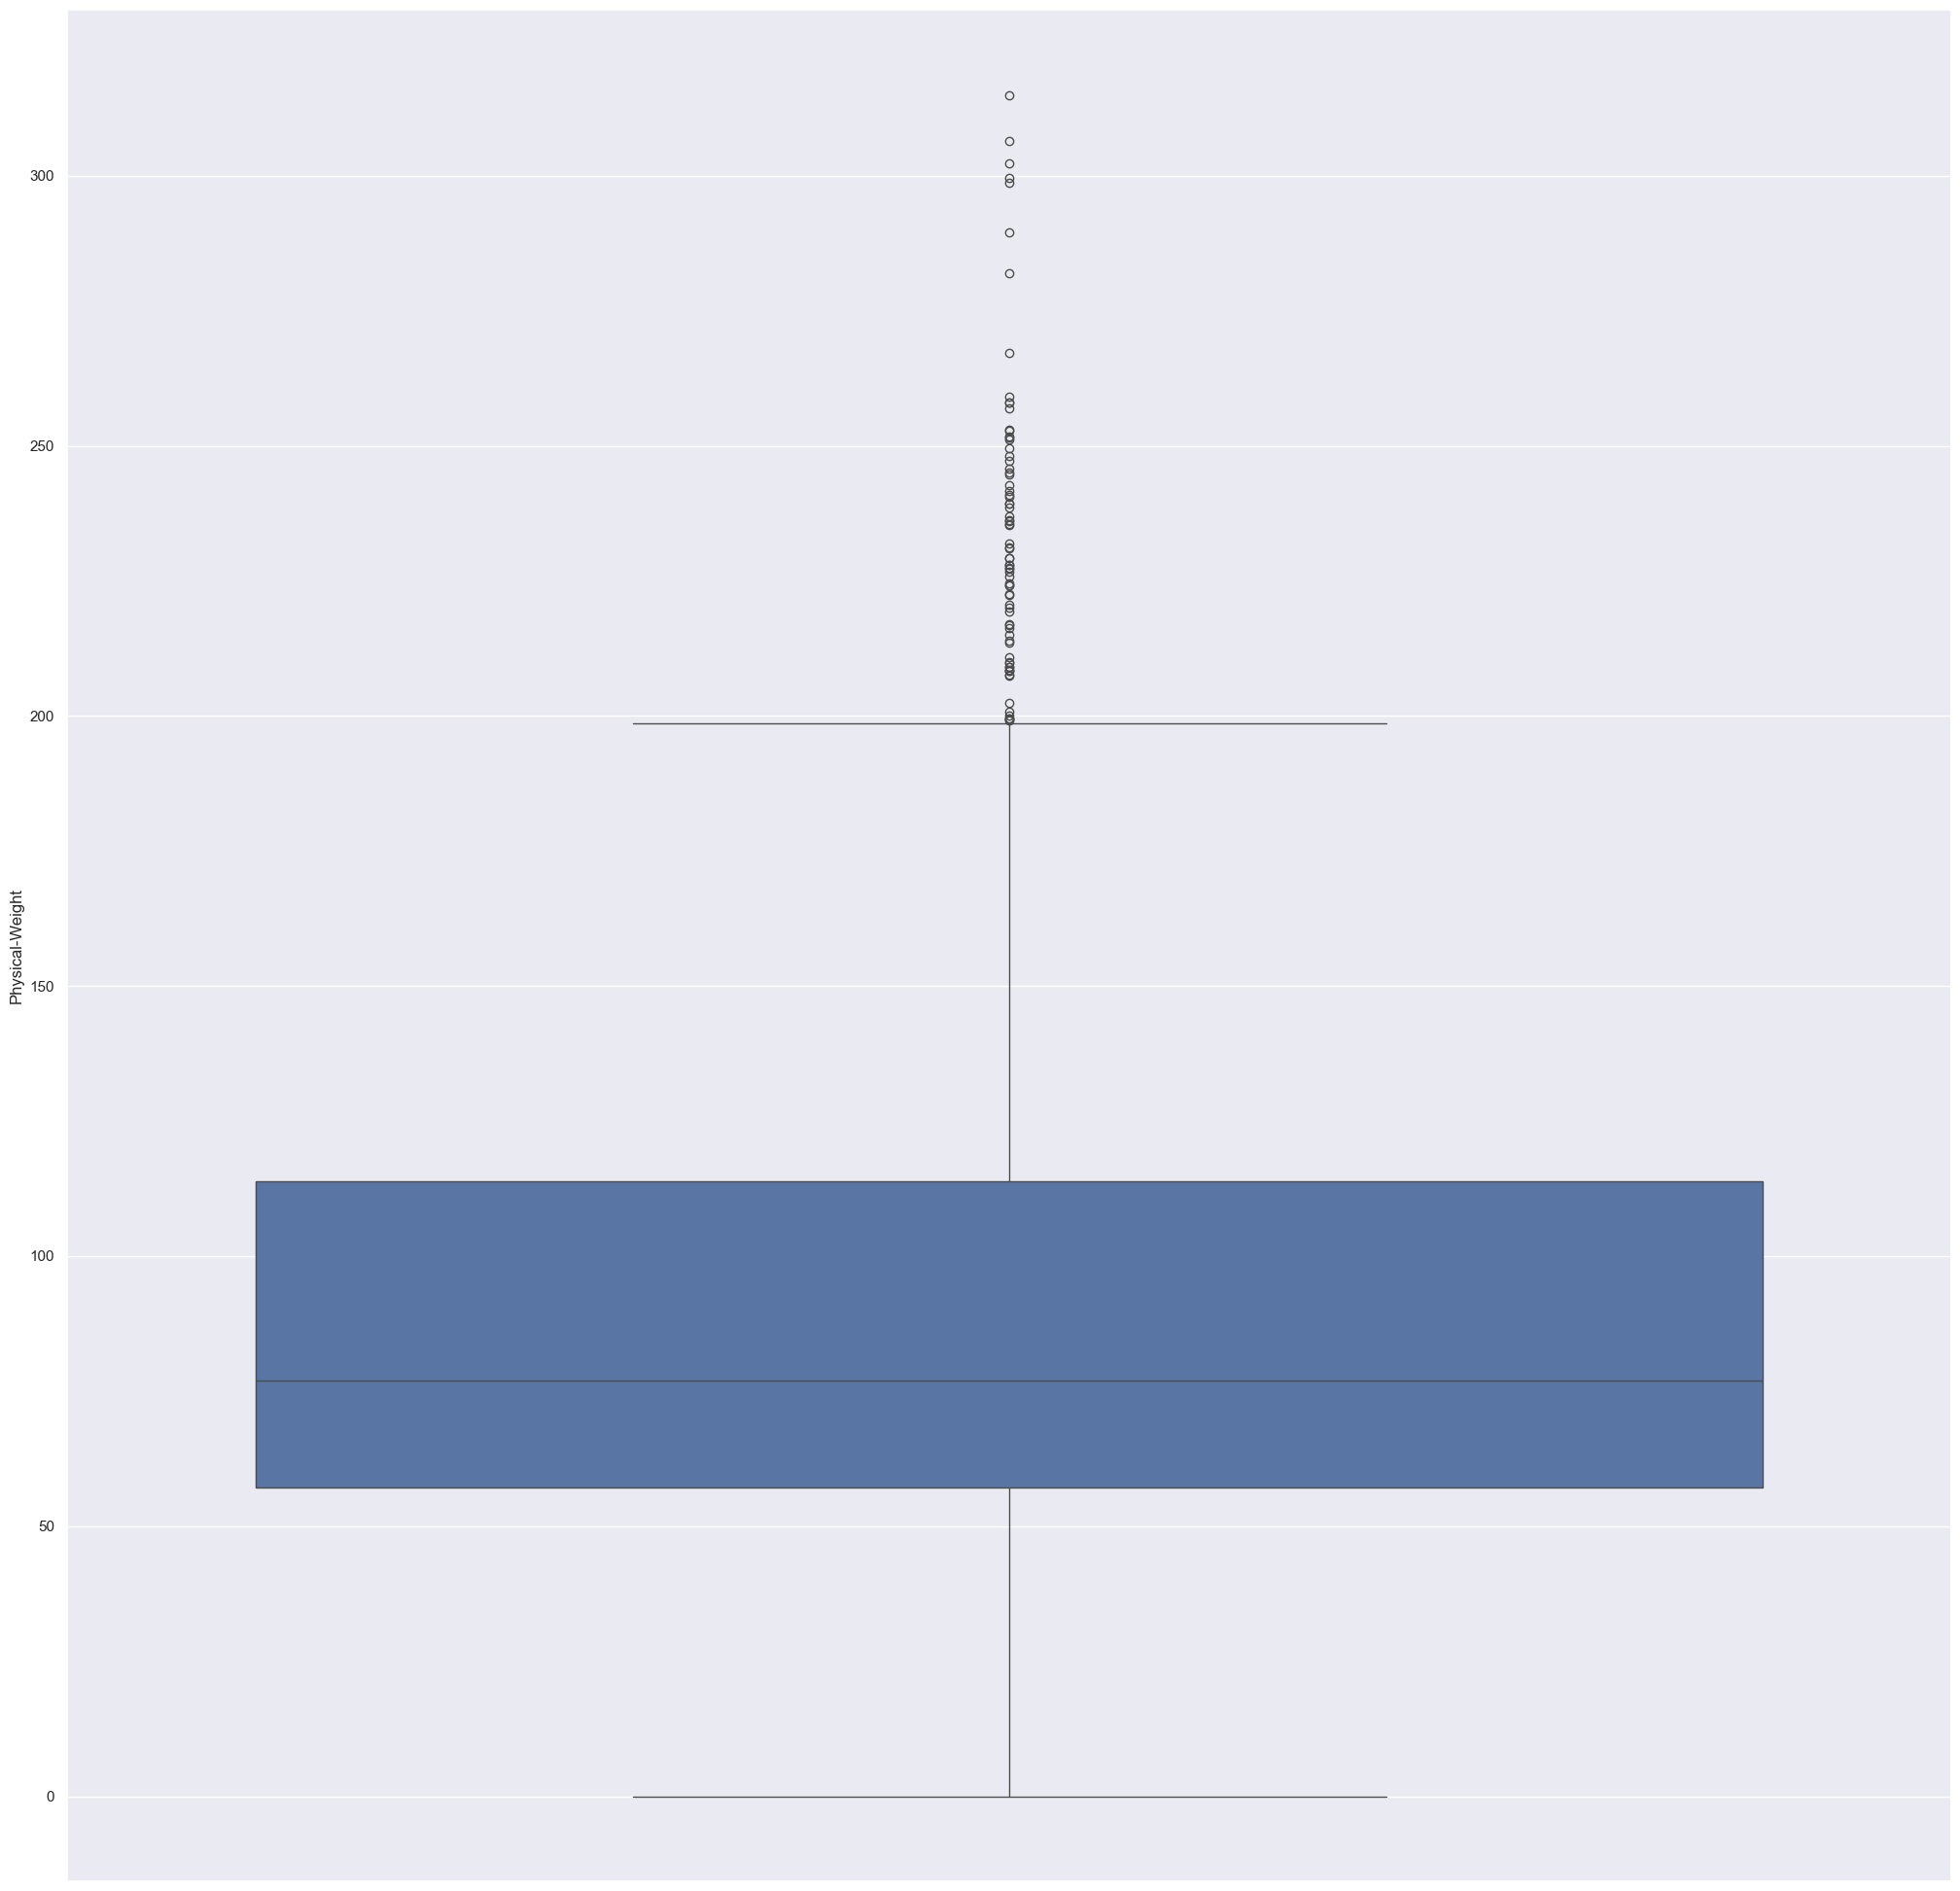

<Figure size 1000x600 with 0 Axes>

In [116]:
sns.set(rc={"figure.figsize":(25,25)})
sns.boxplot(train['Physical-Weight'])
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

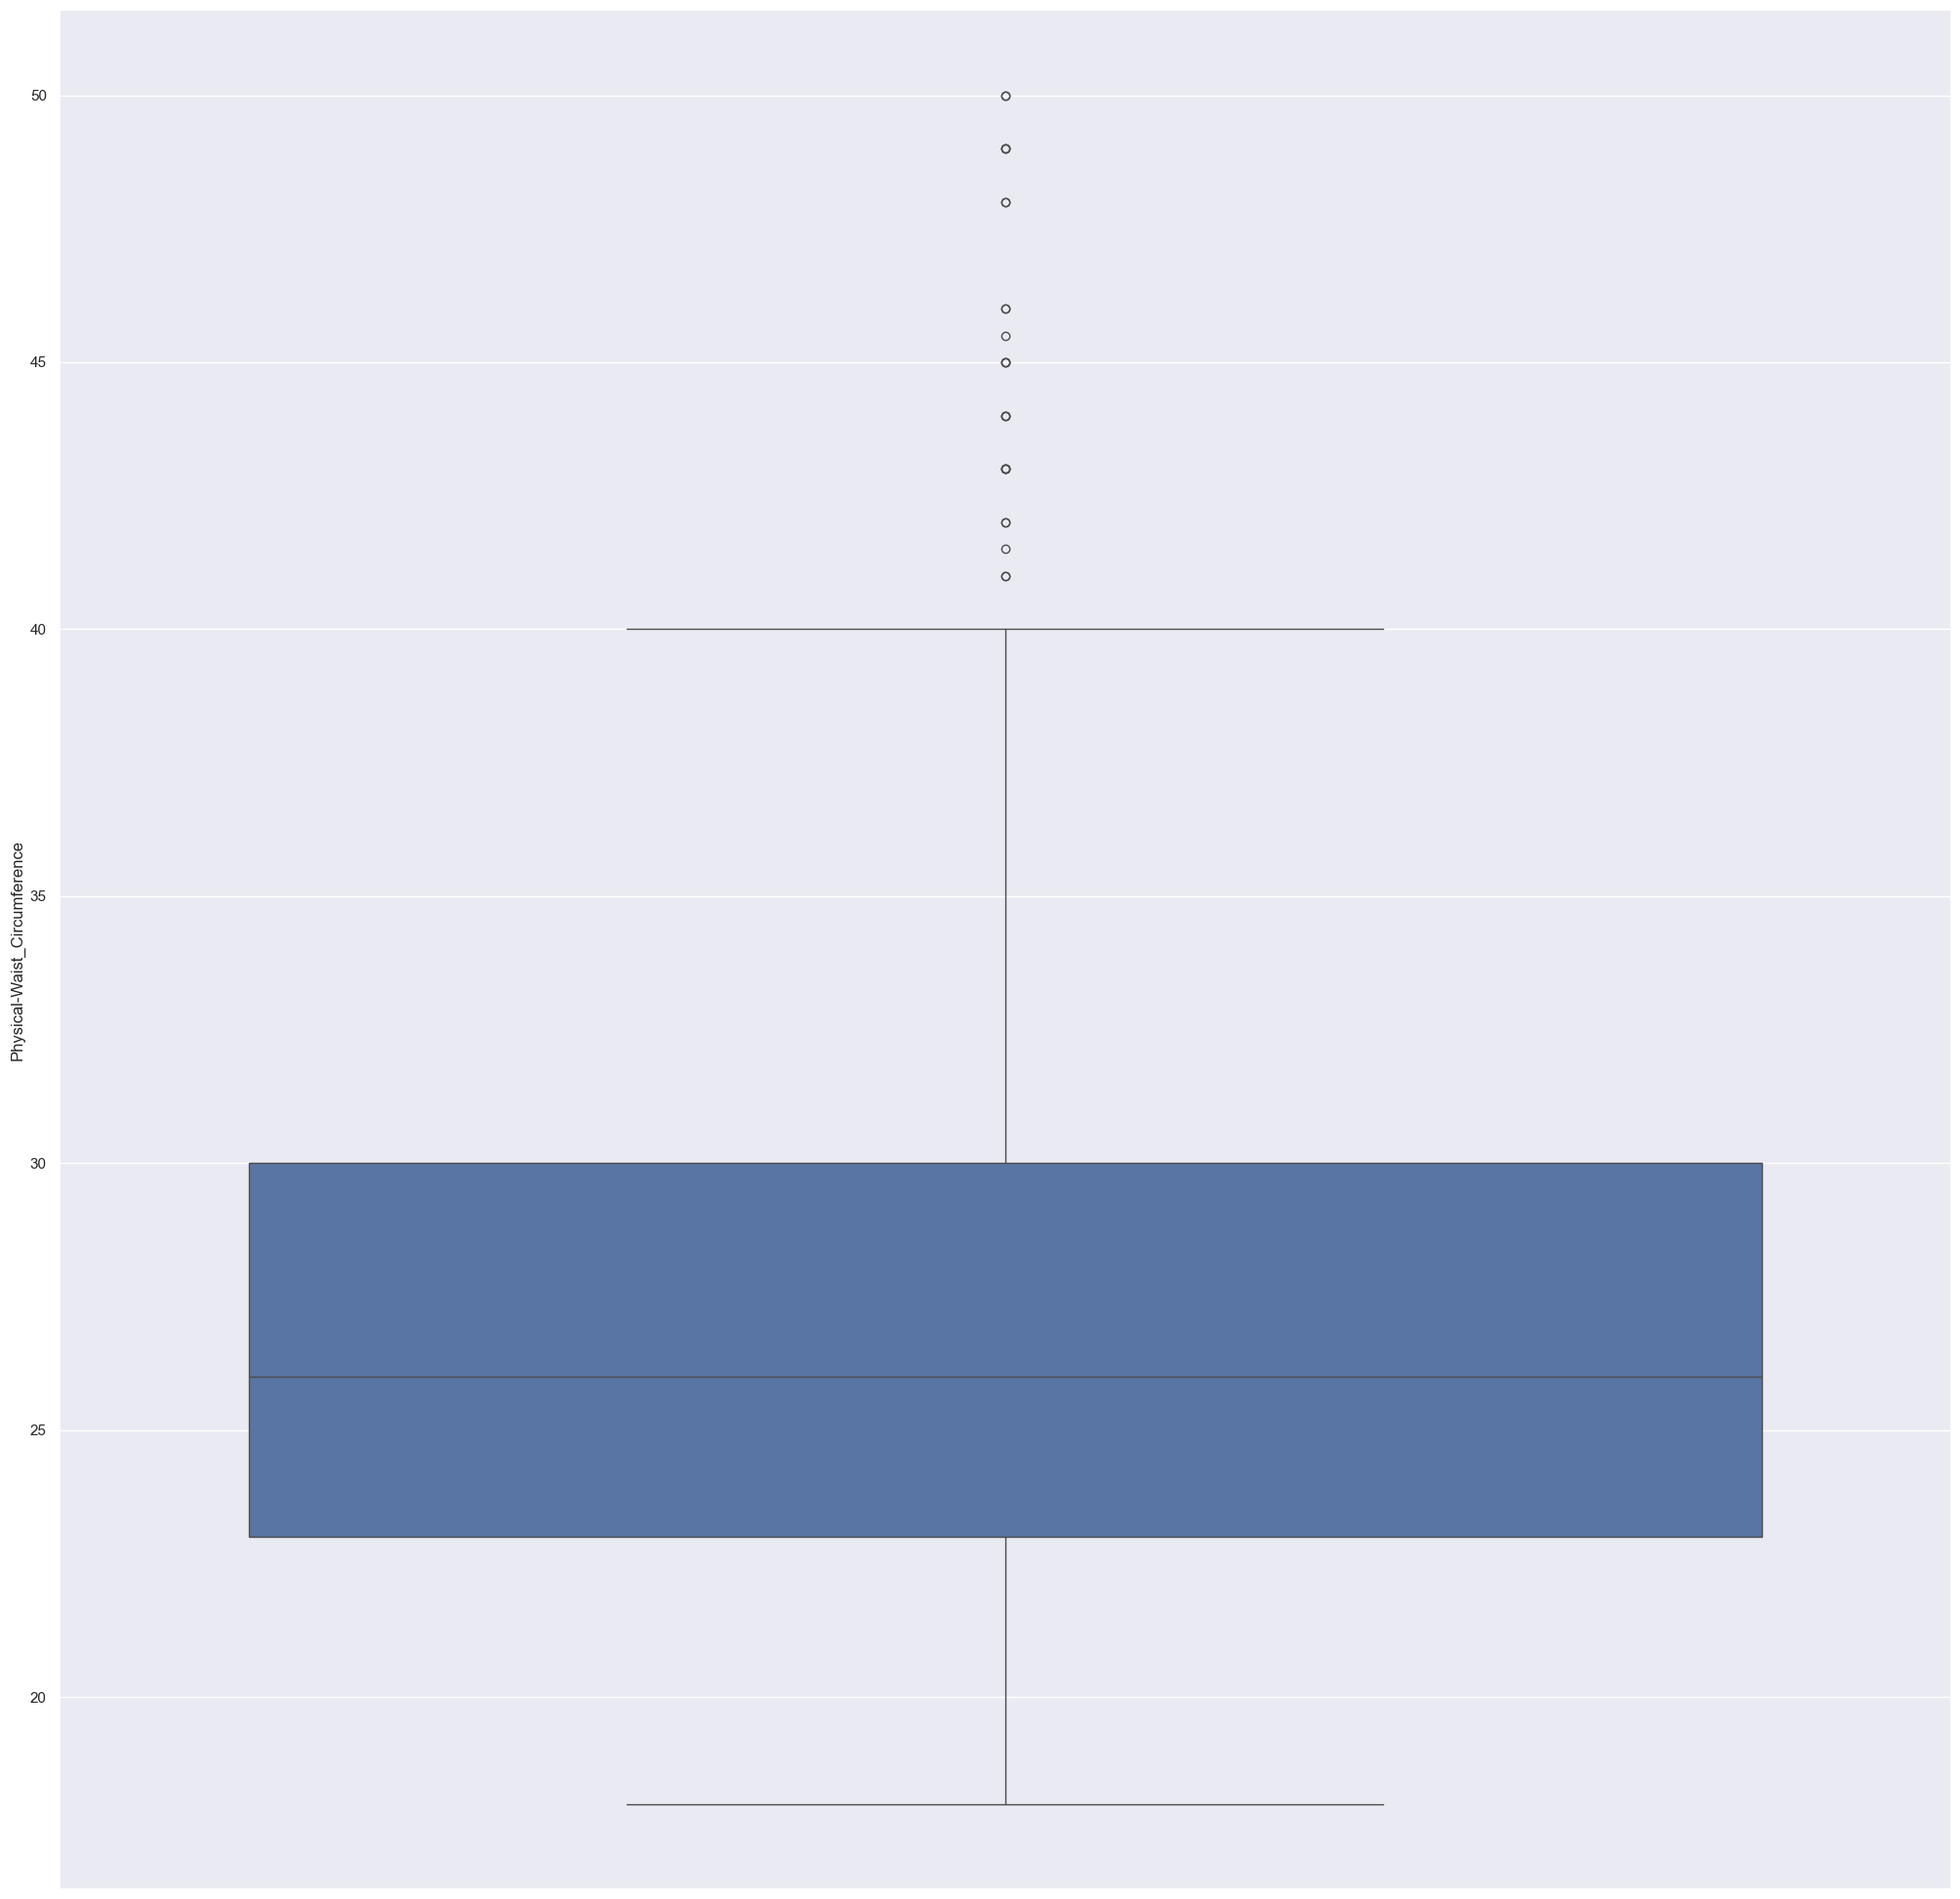

<Figure size 1000x600 with 0 Axes>

In [117]:
sns.boxplot(train['Physical-Waist_Circumference'])
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

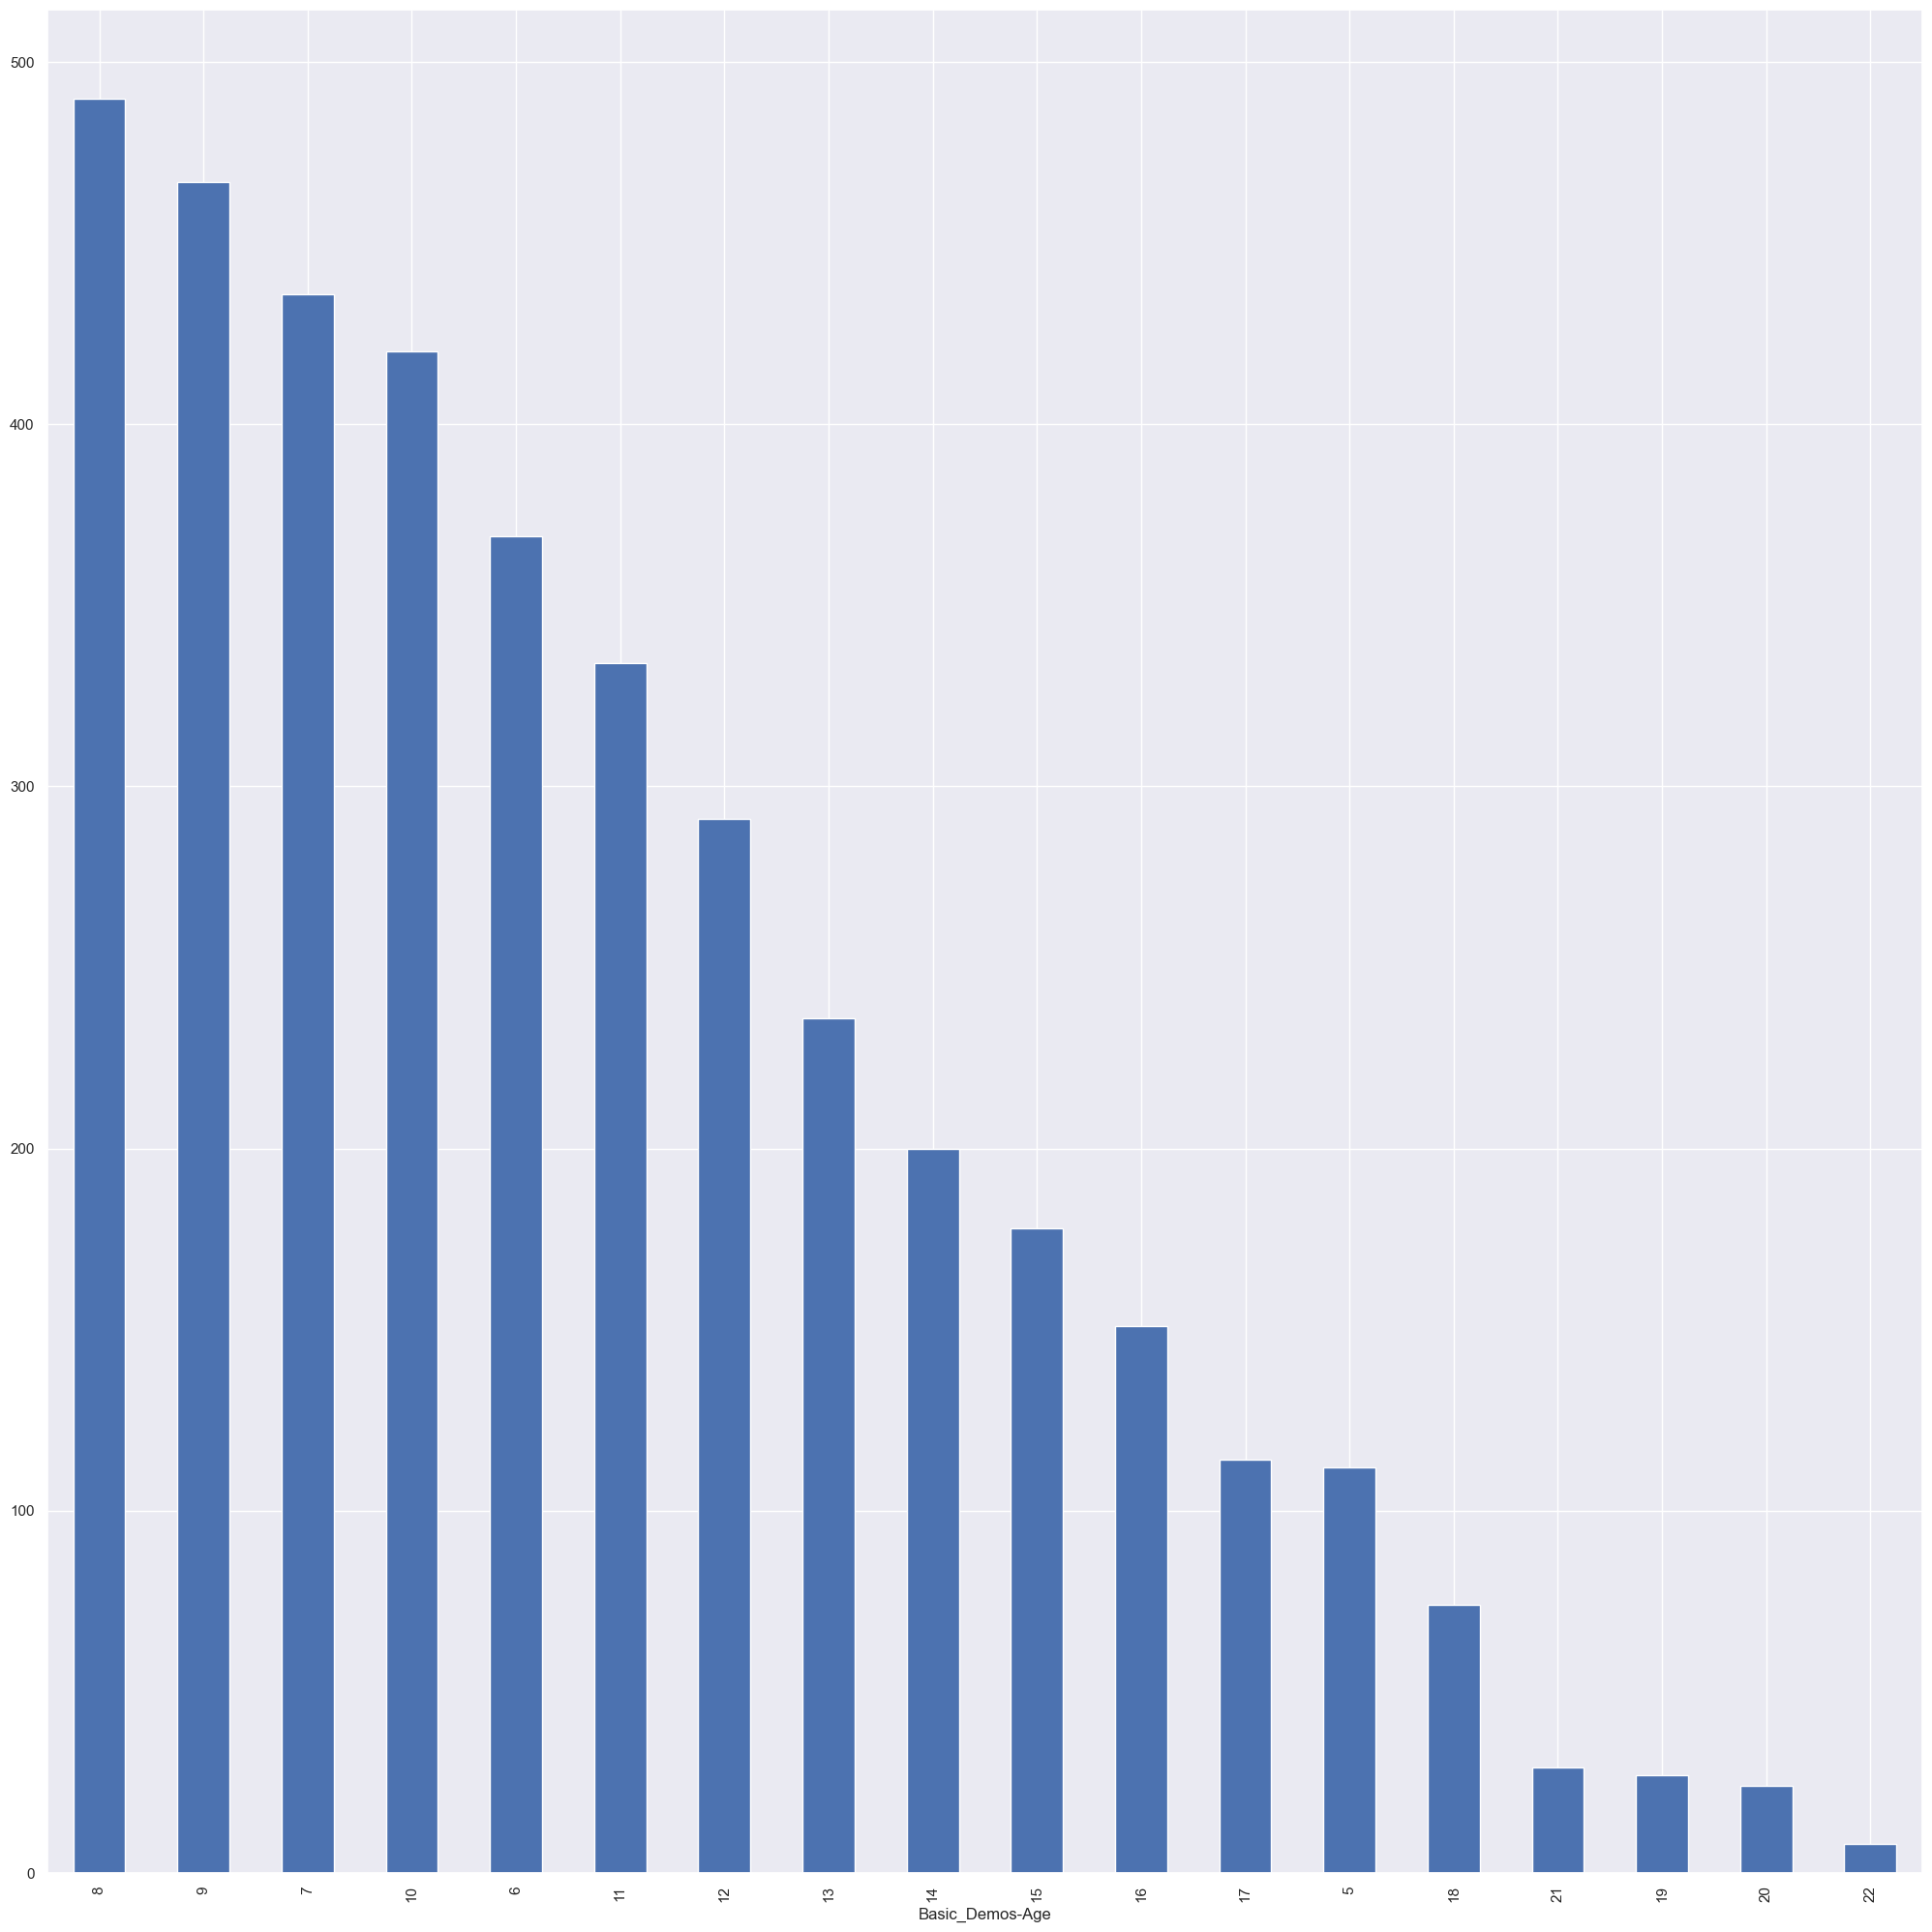

<Figure size 1000x600 with 0 Axes>

In [118]:
train['Basic_Demos-Age'].value_counts().plot(kind='bar')
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

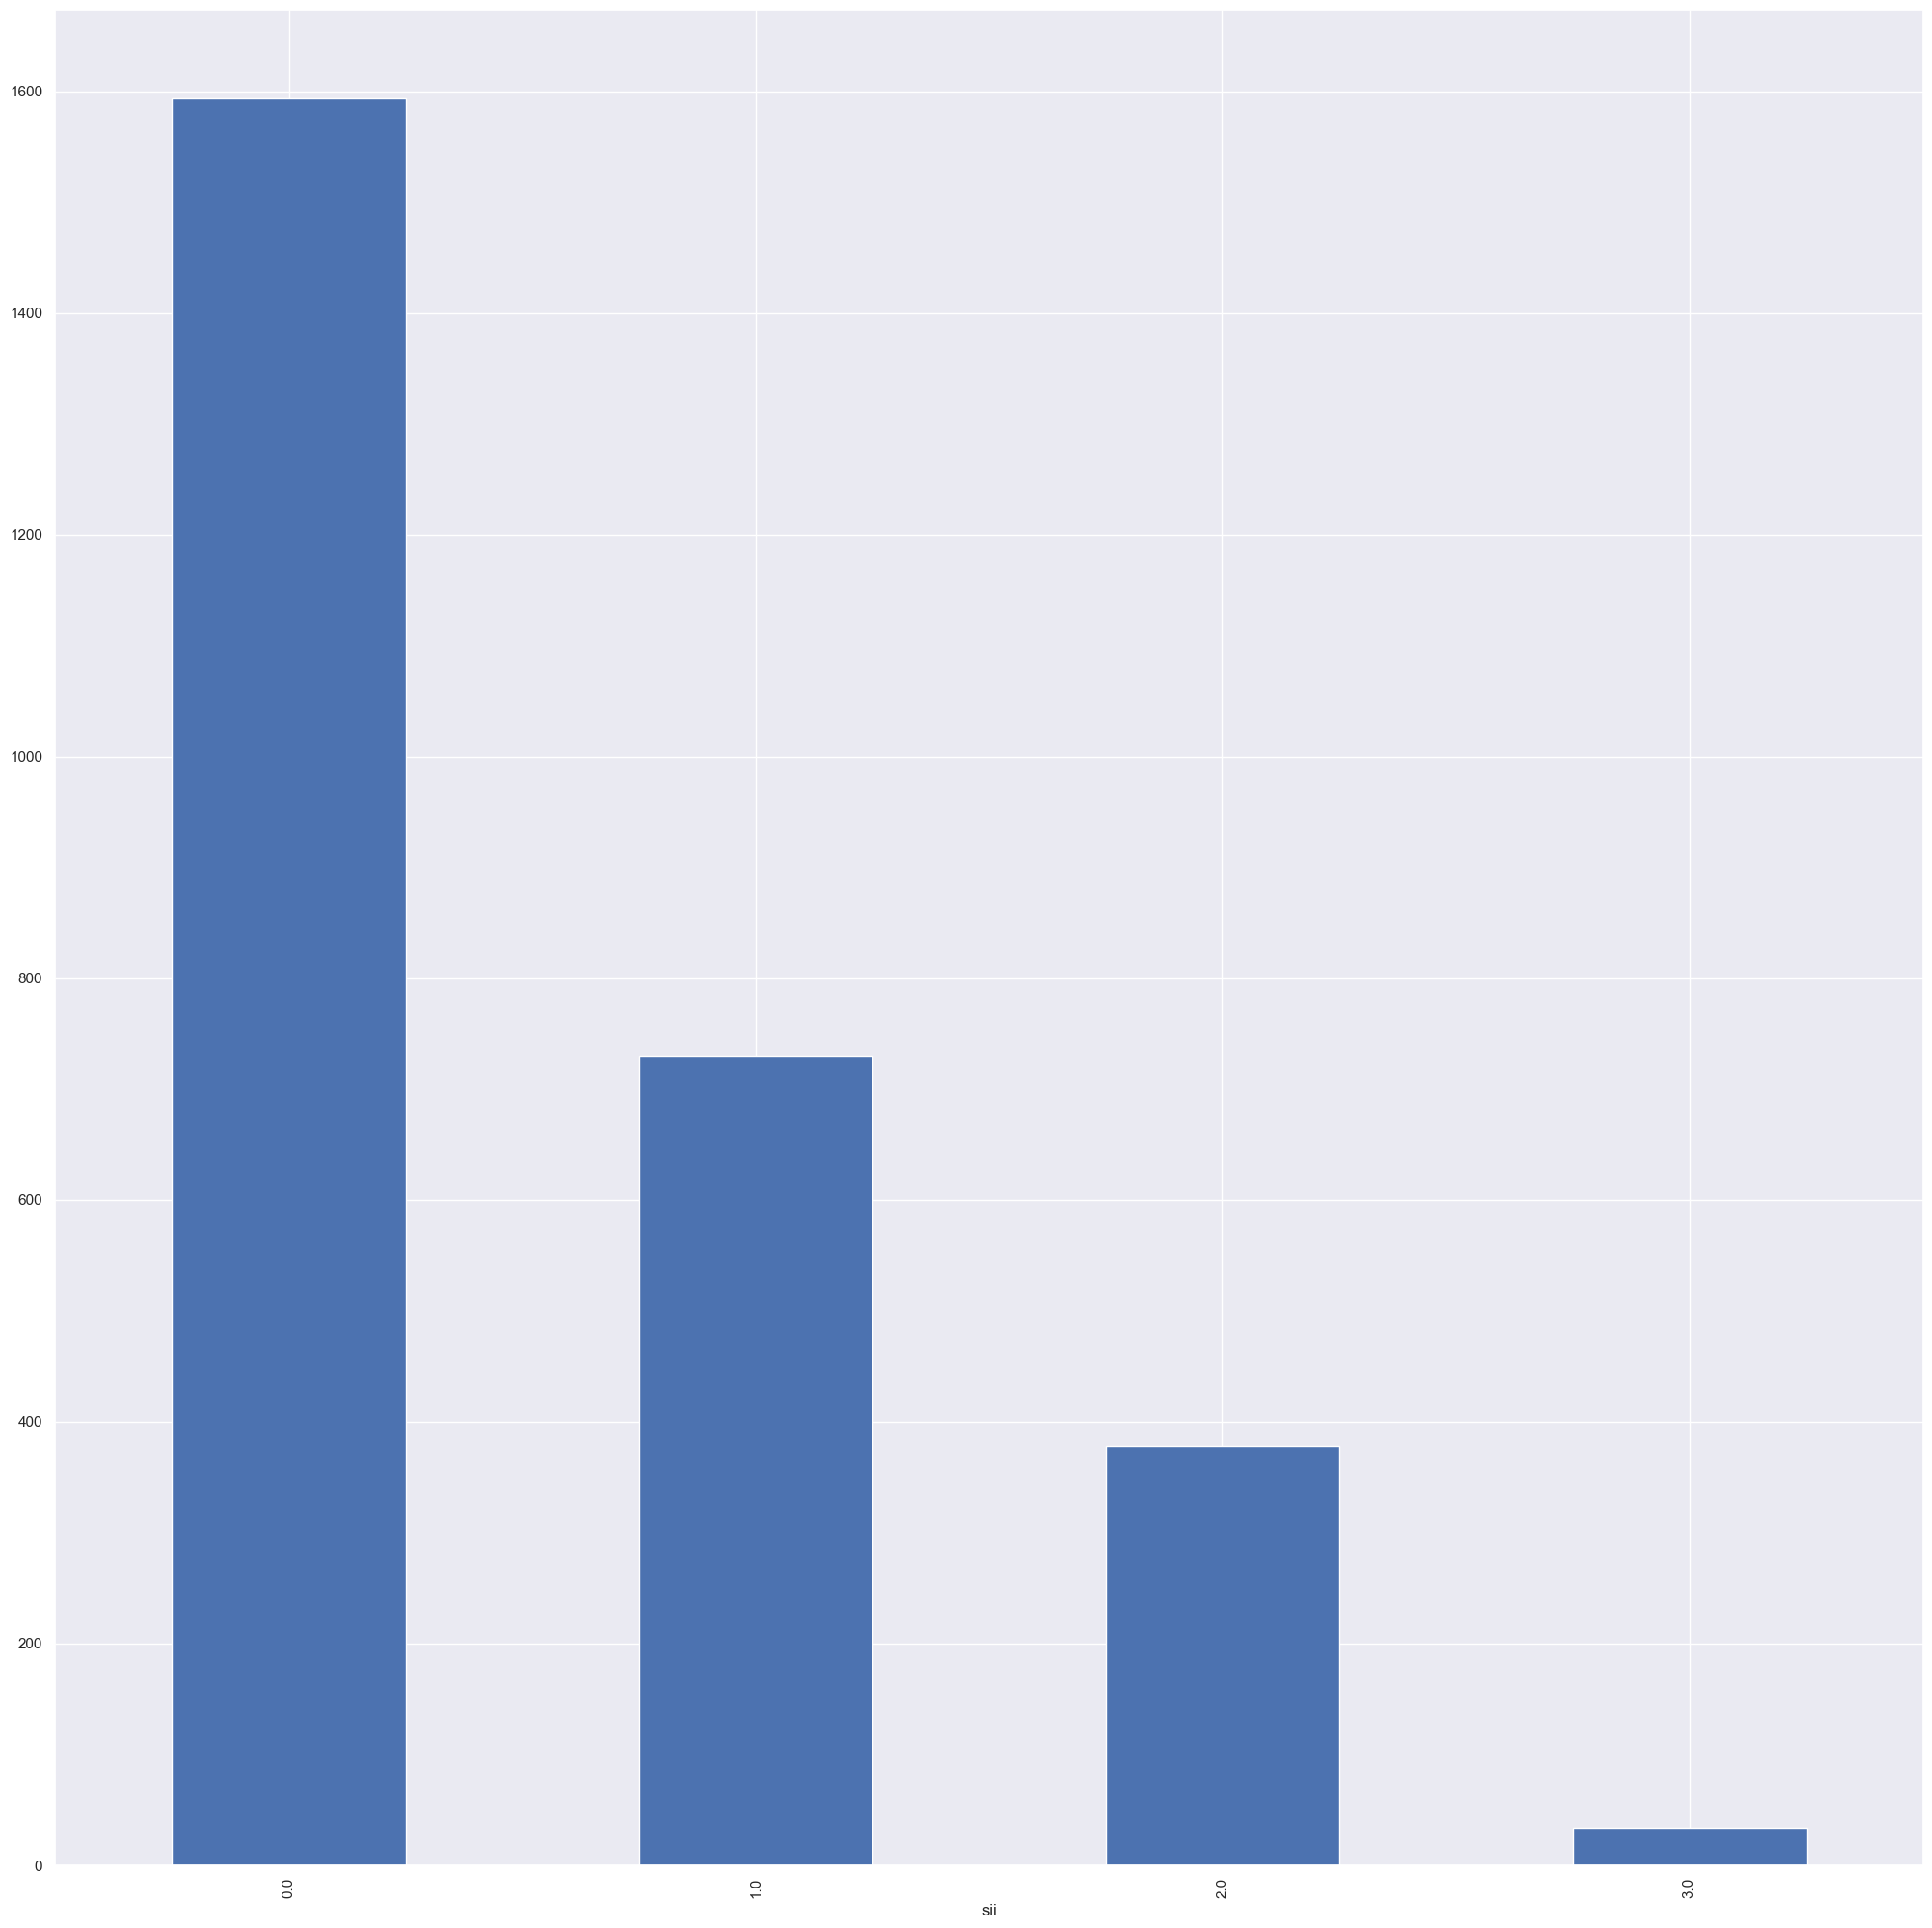

<Figure size 1000x600 with 0 Axes>

In [119]:
train['sii'].value_counts().plot(kind='bar')
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

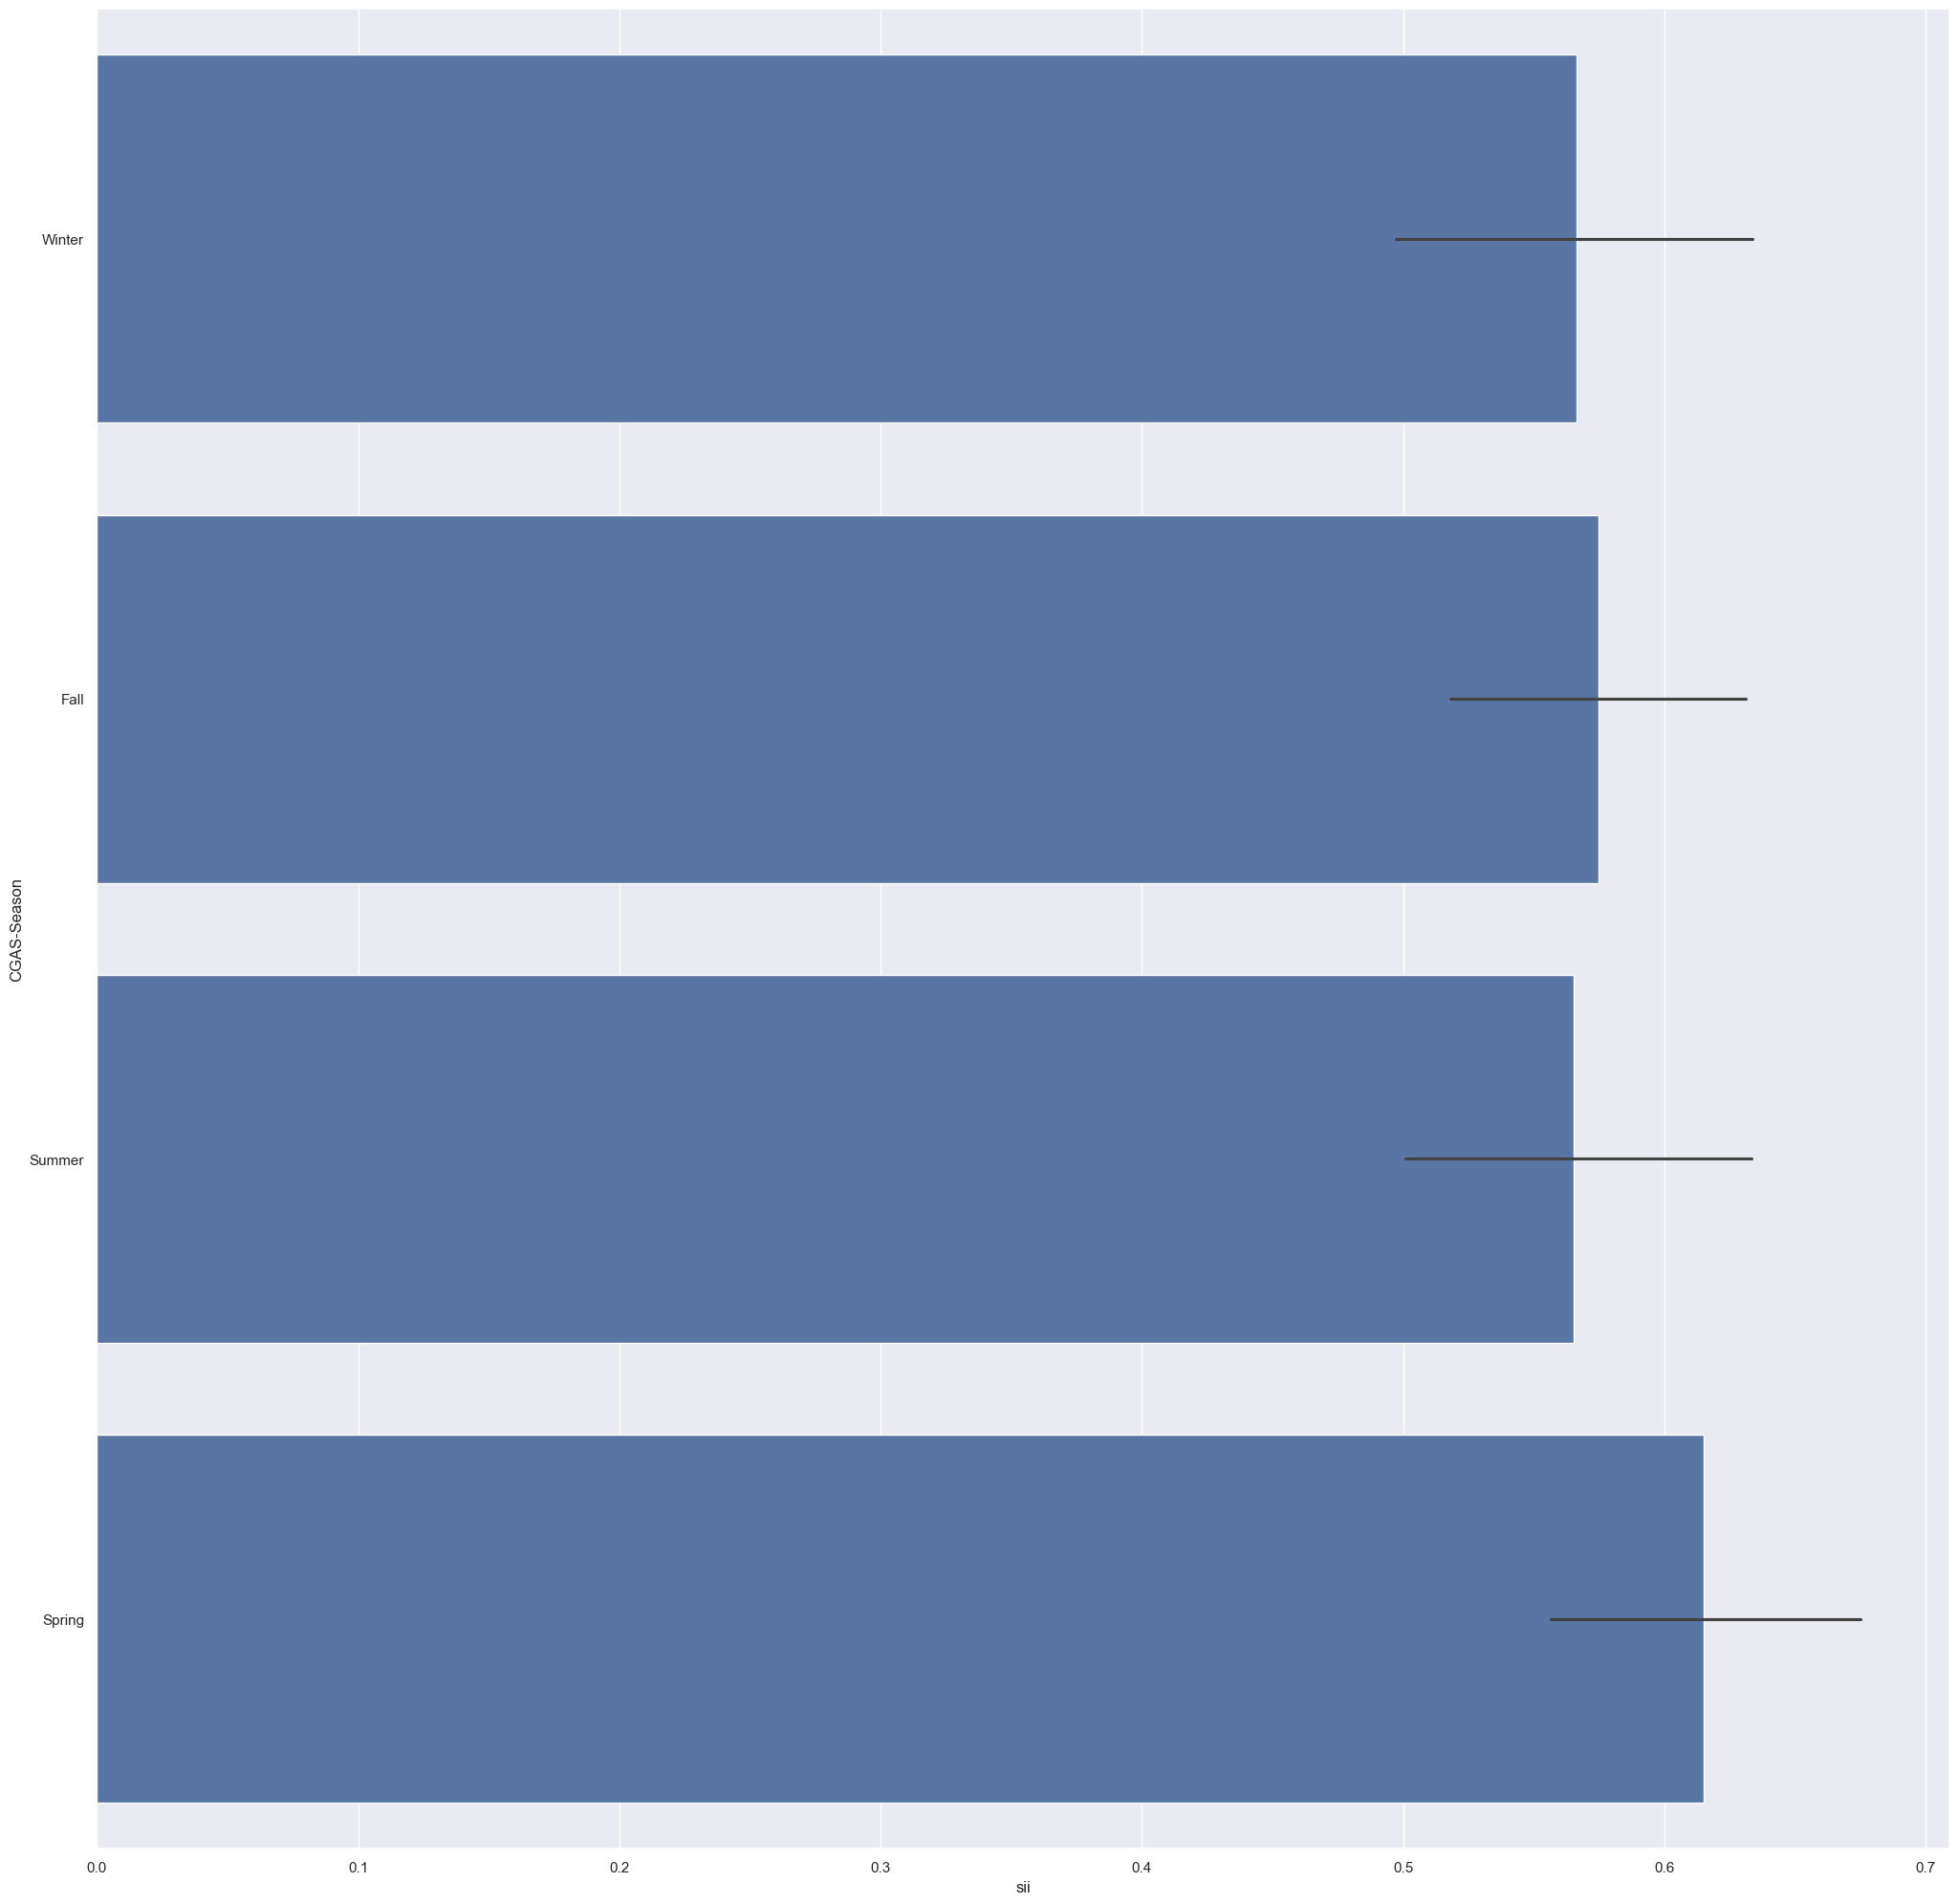

<Figure size 1000x600 with 0 Axes>

In [120]:
sns.barplot(train, x="sii", y="CGAS-Season")
plt.figure(figsize=(10,6))

In [122]:
fgc_col = [col for col in train.columns if col.startswith('FGC-FGC') and col != 'FGC-FGC_Total']
nan_freq = train[pciat].isna().sum()
missing_values = nan_freq[nan_freq > 0]
print("Columns with NaN values in FGC fields:")
print(missing_values)

Columns with NaN values in FGC fields:
PCIAT-PCIAT_01    1227
PCIAT-PCIAT_02    1226
PCIAT-PCIAT_03    1229
PCIAT-PCIAT_04    1229
PCIAT-PCIAT_05    1231
PCIAT-PCIAT_06    1228
PCIAT-PCIAT_07    1231
PCIAT-PCIAT_08    1230
PCIAT-PCIAT_09    1230
PCIAT-PCIAT_10    1227
PCIAT-PCIAT_11    1226
PCIAT-PCIAT_12    1229
PCIAT-PCIAT_13    1231
PCIAT-PCIAT_14    1228
PCIAT-PCIAT_15    1230
PCIAT-PCIAT_16    1232
PCIAT-PCIAT_17    1235
PCIAT-PCIAT_18    1232
PCIAT-PCIAT_19    1230
PCIAT-PCIAT_20    1227
dtype: int64


In [123]:
bia_col = [col for col in train.columns if col.startswith('BIA-BIA') and col != 'BIA-BIA_Total']
nan_freq = train[pciat].isna().sum()
missing_values = nan_freq[nan_freq > 0]
print("Columns with NaN values in BIA fields:")
print(missing_values)

Columns with NaN values in BIA fields:
PCIAT-PCIAT_01    1227
PCIAT-PCIAT_02    1226
PCIAT-PCIAT_03    1229
PCIAT-PCIAT_04    1229
PCIAT-PCIAT_05    1231
PCIAT-PCIAT_06    1228
PCIAT-PCIAT_07    1231
PCIAT-PCIAT_08    1230
PCIAT-PCIAT_09    1230
PCIAT-PCIAT_10    1227
PCIAT-PCIAT_11    1226
PCIAT-PCIAT_12    1229
PCIAT-PCIAT_13    1231
PCIAT-PCIAT_14    1228
PCIAT-PCIAT_15    1230
PCIAT-PCIAT_16    1232
PCIAT-PCIAT_17    1235
PCIAT-PCIAT_18    1232
PCIAT-PCIAT_19    1230
PCIAT-PCIAT_20    1227
dtype: int64


In [124]:
bia_ = ['BIA-BIA_Activity_Level_num',
               'BIA-BIA_BMC',
               'BIA-BIA_BMI',
               'BIA-BIA_BMR',
               'BIA-BIA_DEE',
               'BIA-BIA_ECW',
               'BIA-BIA_FFM',
               'BIA-BIA_FFMI',
               'BIA-BIA_FMI',
               'BIA-BIA_Fat',
               'BIA-BIA_Frame_num',
               'BIA-BIA_ICW',
               'BIA-BIA_LDM',
               'BIA-BIA_LST',
               'BIA-BIA_SMM',
               'BIA-BIA_TBW'
               ]
bia_df = train[bia_]

bia_df.isnull().sum()

BIA-BIA_Activity_Level_num    1969
BIA-BIA_BMC                   1969
BIA-BIA_BMI                   1969
BIA-BIA_BMR                   1969
BIA-BIA_DEE                   1969
BIA-BIA_ECW                   1969
BIA-BIA_FFM                   1969
BIA-BIA_FFMI                  1969
BIA-BIA_FMI                   1969
BIA-BIA_Fat                   1969
BIA-BIA_Frame_num             1969
BIA-BIA_ICW                   1969
BIA-BIA_LDM                   1969
BIA-BIA_LST                   1969
BIA-BIA_SMM                   1969
BIA-BIA_TBW                   1969
dtype: int64

In [125]:
# bia_df =bia_df.fillna(bia_df.median())

# bia_df.isnull().sum()

<Figure size 1000x600 with 0 Axes>

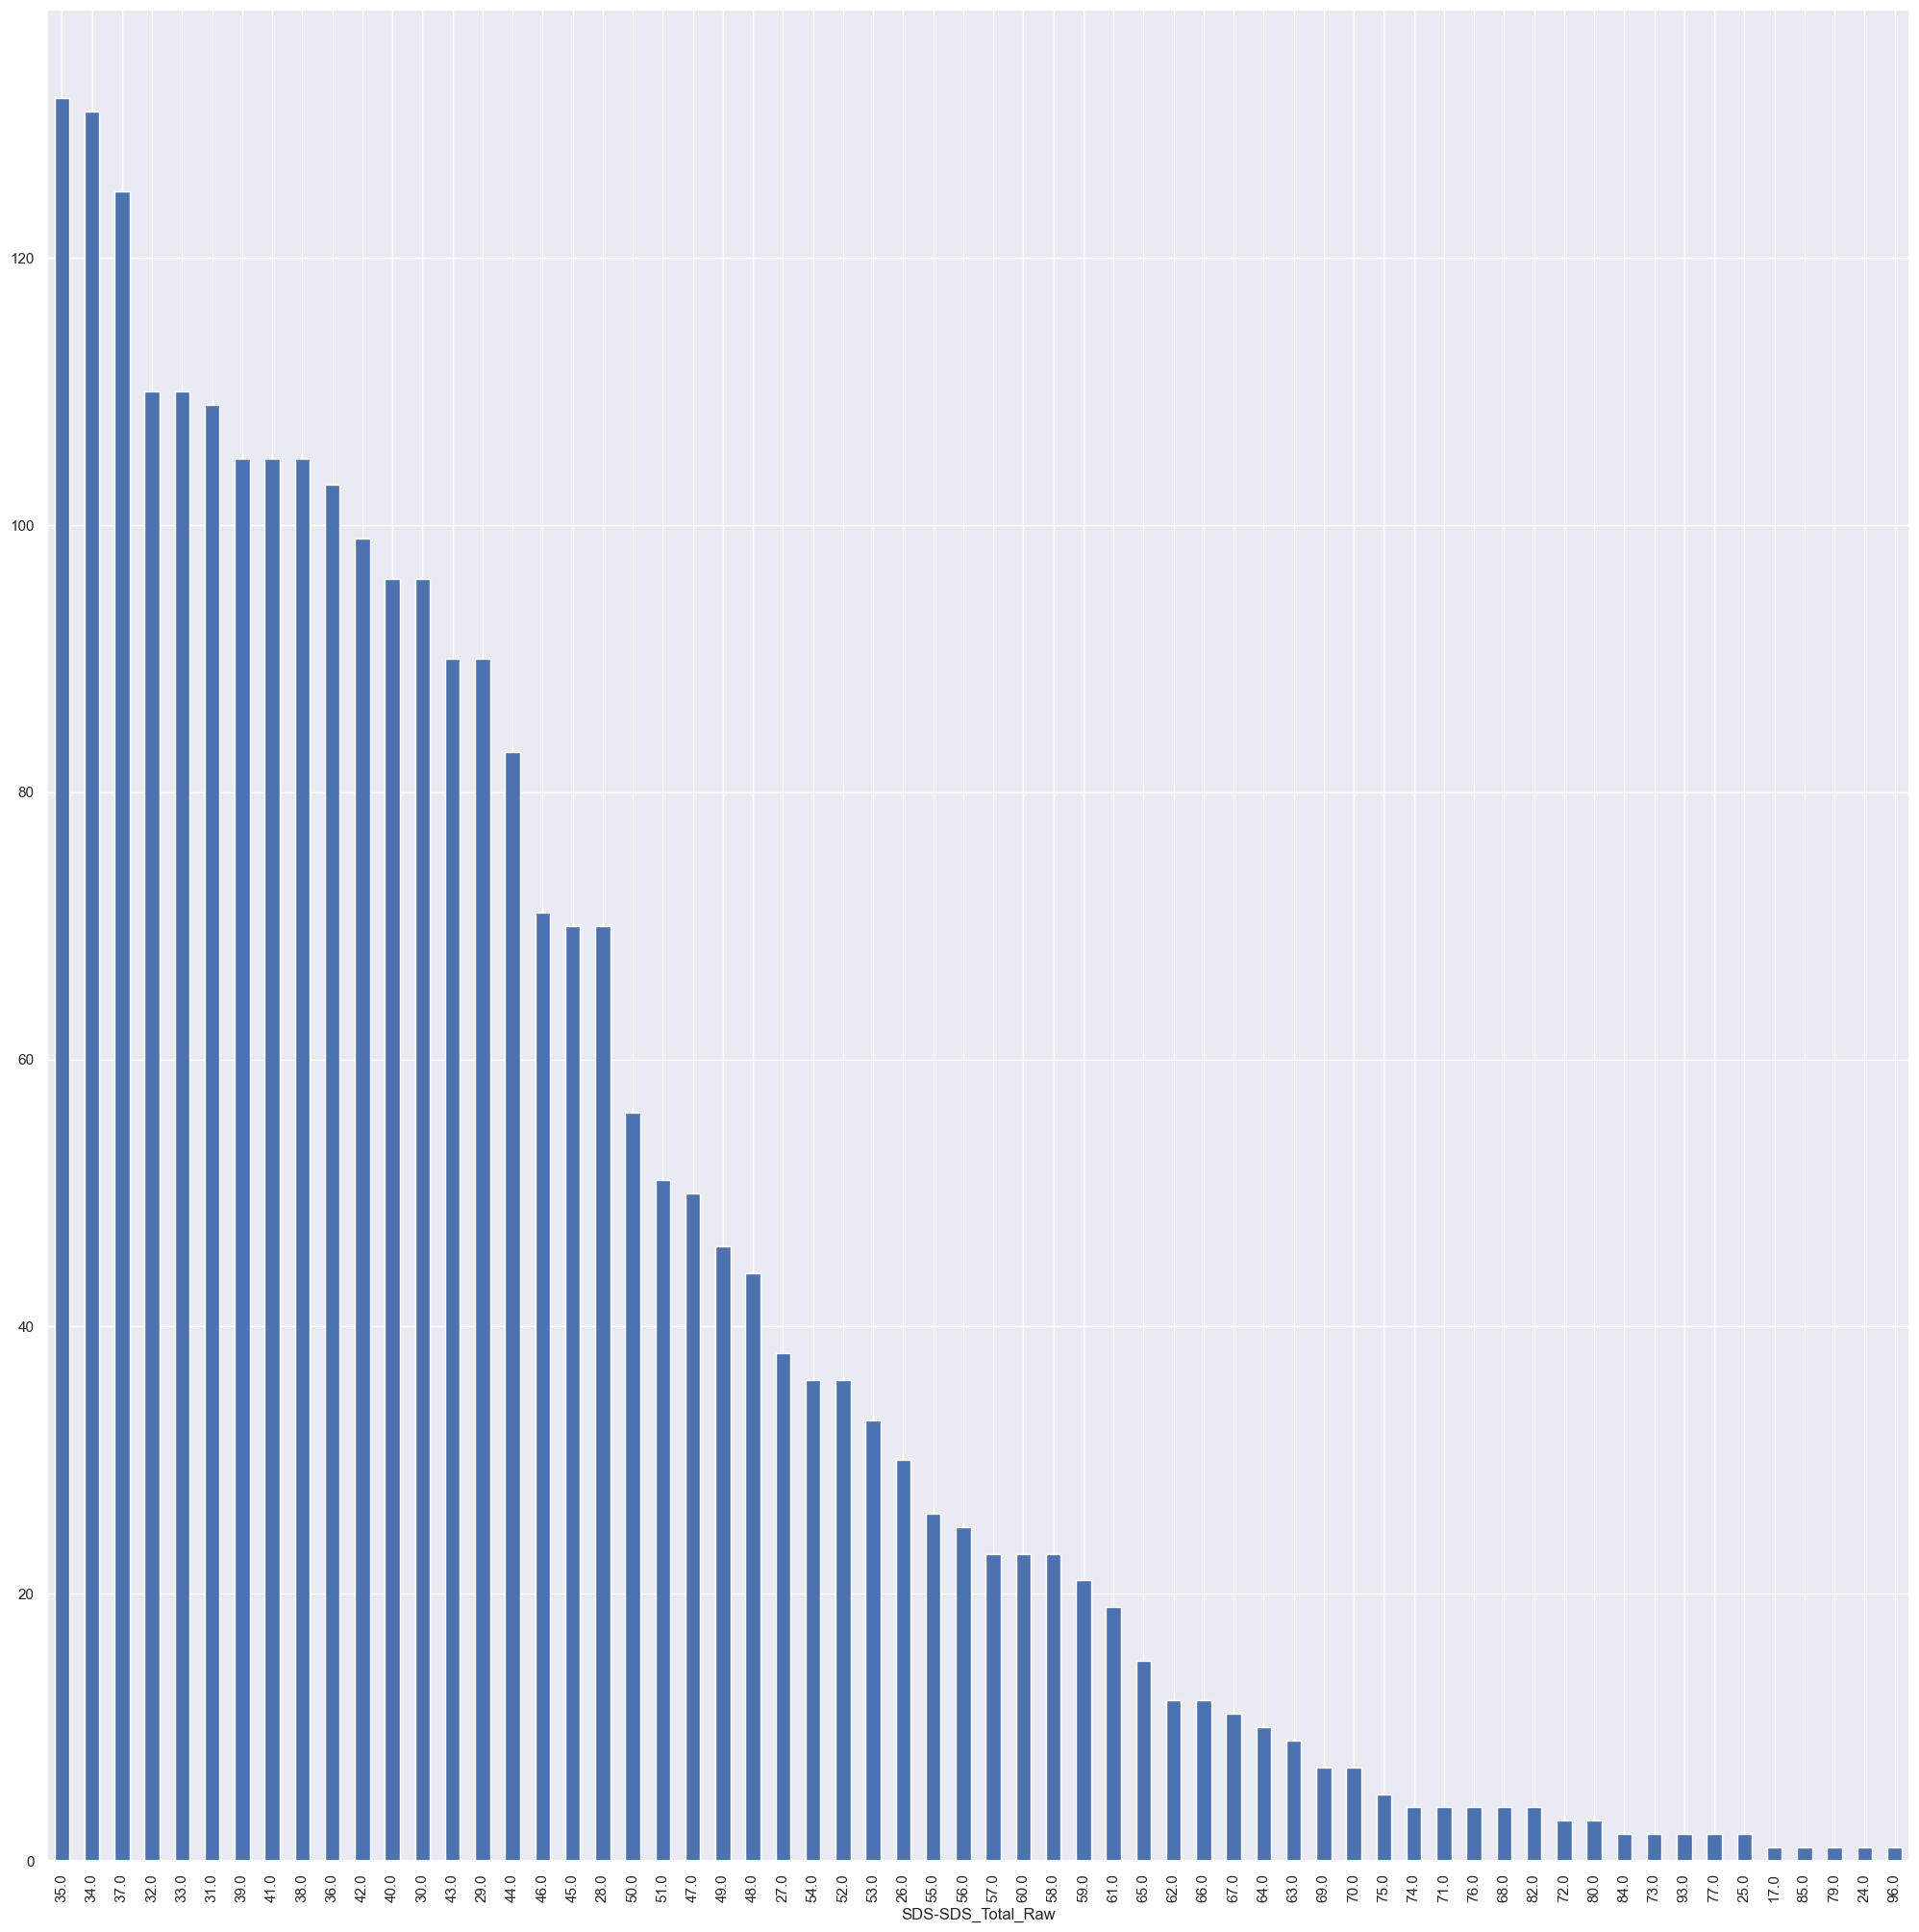

<Figure size 1000x600 with 0 Axes>

In [126]:
sleep_dataframe = train['SDS-SDS_Total_Raw'].value_counts().plot(kind='bar')
plt.figure(figsize=(10,6))

/var/folders/w2/t627t88j5nsfjtdlp6wzcfz40000gn/T/ipykernel_72826/4111935244.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(train, x='PCIAT-PCIAT_01', width=0.8, palette='Paired')


Text(0.5, 1.0, 'How often does your child disobey time limits you set for online use?')

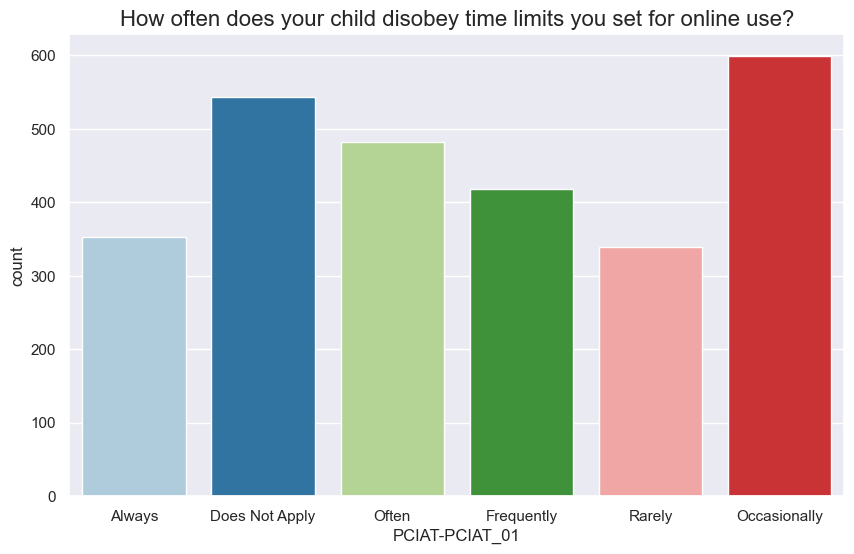

In [127]:
train['PCIAT-PCIAT_01'] = train['PCIAT-PCIAT_01'].map({
    0: "Does Not Apply", 
    1: "Rarely", 
    2: "Occasionally", 
    3: "Frequently", 
    4: "Often", 
    5: "Always"
})
plt.figure(figsize=(10,6))
sns.countplot(train, x='PCIAT-PCIAT_01', width=0.8, palette='Paired')
plt.title("How often does your child disobey time limits you set for online use?", fontsize=16) 

/var/folders/w2/t627t88j5nsfjtdlp6wzcfz40000gn/T/ipykernel_72826/123218601.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(train, x='PCIAT-PCIAT_02', width=0.8, palette='Paired')


Text(0.5, 1.0, 'How often does your child neglect household chores to spend more time online?')

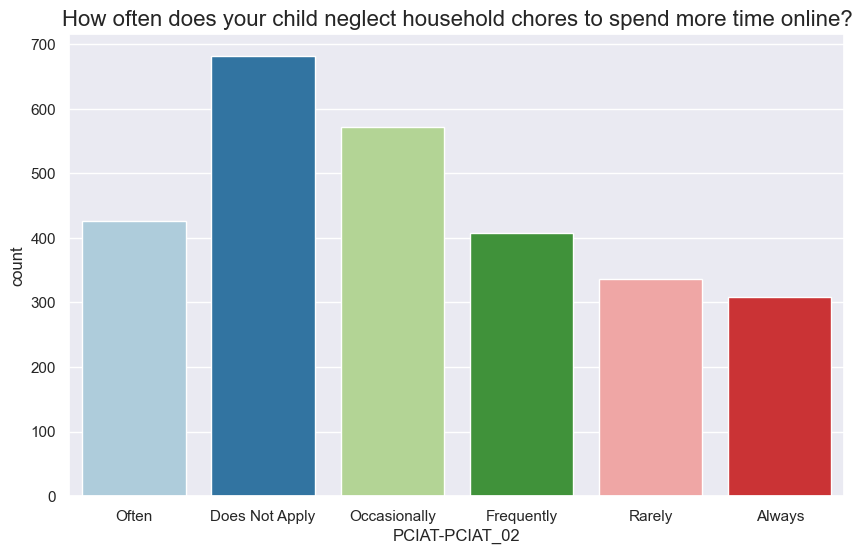

In [128]:
train['PCIAT-PCIAT_02'] = train['PCIAT-PCIAT_02'].map({
    0: "Does Not Apply", 
    1: "Rarely", 
    2: "Occasionally", 
    3: "Frequently", 
    4: "Often", 
    5: "Always"
})
plt.figure(figsize=(10,6))
sns.countplot(train, x='PCIAT-PCIAT_02', width=0.8, palette='Paired')
plt.title("How often does your child neglect household chores to spend more time online?", fontsize=16) 

/var/folders/w2/t627t88j5nsfjtdlp6wzcfz40000gn/T/ipykernel_72826/1852977331.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(train, x='PCIAT-PCIAT_03', width=0.8, palette='Paired')


Text(0.5, 1.0, 'How often does your child prefer to spend time online rather than with the rest of your family?')

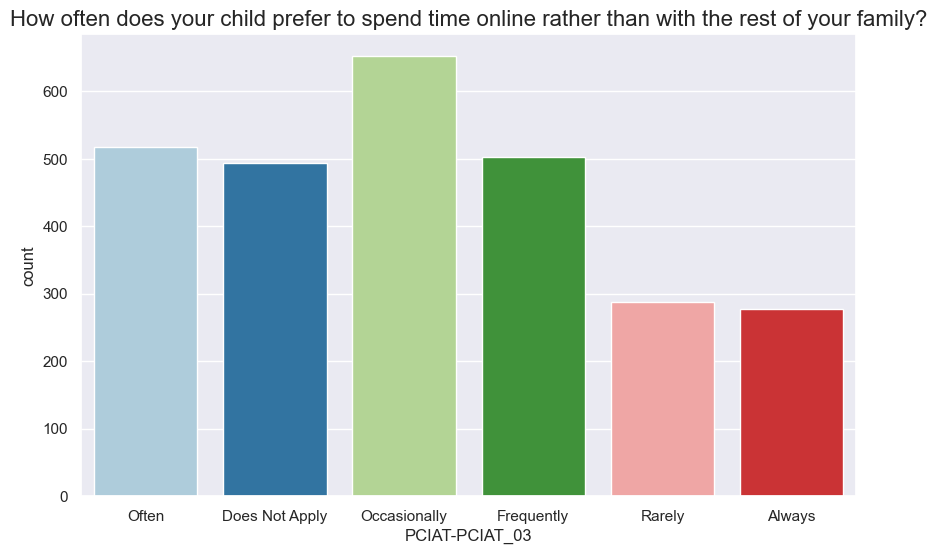

In [129]:
train['PCIAT-PCIAT_03'] = train['PCIAT-PCIAT_03'].map({
    0: "Does Not Apply", 
    1: "Rarely", 
    2: "Occasionally", 
    3: "Frequently", 
    4: "Often", 
    5: "Always"
})
plt.figure(figsize=(10,6))
sns.countplot(train, x='PCIAT-PCIAT_03', width=0.8, palette='Paired')
plt.title("How often does your child prefer to spend time online rather than with the rest of your family?", fontsize=16) 

/var/folders/w2/t627t88j5nsfjtdlp6wzcfz40000gn/T/ipykernel_72826/3585256237.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(train, x='PCIAT-PCIAT_04', width=0.8, palette='Paired')


Text(0.5, 1.0, 'How often does your child form new relationships with fellow online users?')

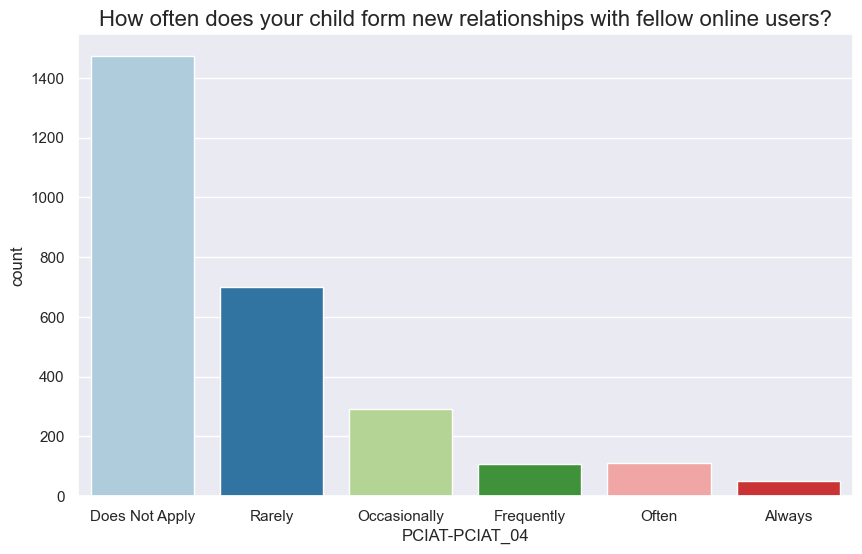

In [130]:
train['PCIAT-PCIAT_04'] = train['PCIAT-PCIAT_04'].map({
    0: "Does Not Apply", 
    1: "Rarely", 
    2: "Occasionally", 
    3: "Frequently", 
    4: "Often", 
    5: "Always"
})
plt.figure(figsize=(10,6))
sns.countplot(train, x='PCIAT-PCIAT_04', width=0.8, palette='Paired')
plt.title("How often does your child form new relationships with fellow online users?", fontsize=16) 

/var/folders/w2/t627t88j5nsfjtdlp6wzcfz40000gn/T/ipykernel_72826/3889204924.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(train, x='PCIAT-PCIAT_05', width=0.8, palette='Paired')


Text(0.5, 1.0, 'How often do you complain about the amount of time your child spends online?')

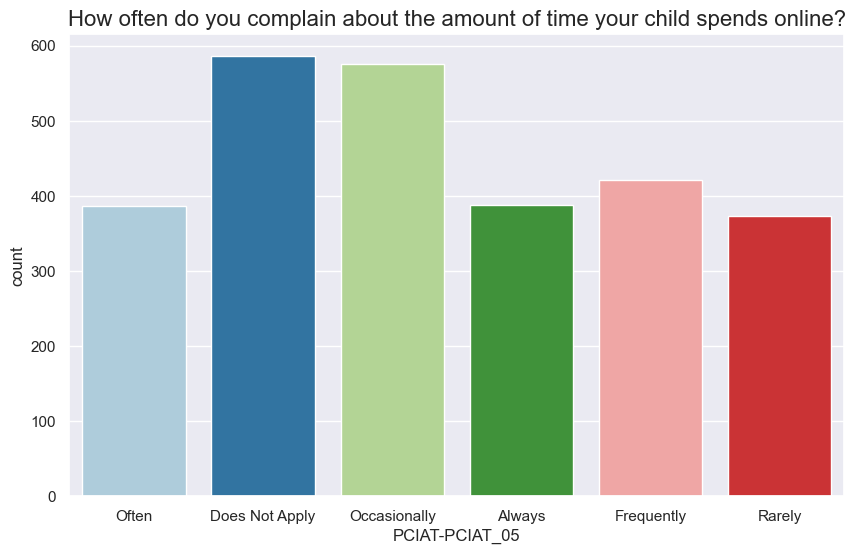

In [131]:
train['PCIAT-PCIAT_05'] = train['PCIAT-PCIAT_05'].map({
    0: "Does Not Apply", 
    1: "Rarely", 
    2: "Occasionally", 
    3: "Frequently", 
    4: "Often", 
    5: "Always"
})
plt.figure(figsize=(10,6))
sns.countplot(train, x='PCIAT-PCIAT_05', width=0.8, palette='Paired')
plt.title("How often do you complain about the amount of time your child spends online?", fontsize=16) 

/var/folders/w2/t627t88j5nsfjtdlp6wzcfz40000gn/T/ipykernel_72826/3871518670.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(train, x='PCIAT-PCIAT_06', width=0.8, palette='Paired')


Text(0.5, 1.0, "How often do your child's grades suffer because of the amount of time he or she spends online?")

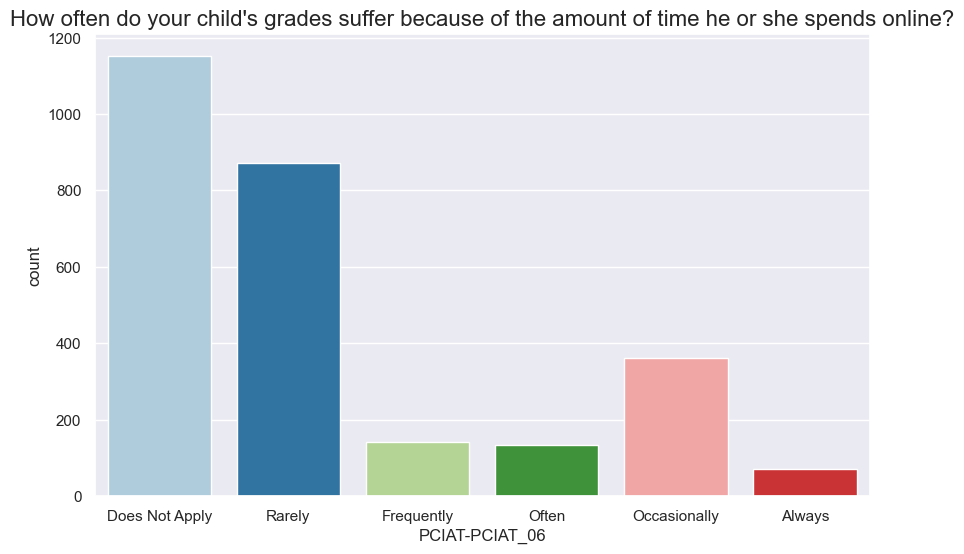

In [132]:
train['PCIAT-PCIAT_06'] = train['PCIAT-PCIAT_06'].map({
    0: "Does Not Apply", 
    1: "Rarely", 
    2: "Occasionally", 
    3: "Frequently", 
    4: "Often", 
    5: "Always"
})
plt.figure(figsize=(10,6))
sns.countplot(train, x='PCIAT-PCIAT_06', width=0.8, palette='Paired')
plt.title("How often do your child's grades suffer because of the amount of time he or she spends online?", fontsize=16) 

/var/folders/w2/t627t88j5nsfjtdlp6wzcfz40000gn/T/ipykernel_72826/1852934593.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(train, x='PCIAT-PCIAT_07', width=0.8, palette='Paired')


Text(0.5, 1.0, 'How often does your child check his or her e-mail before doing something else?')

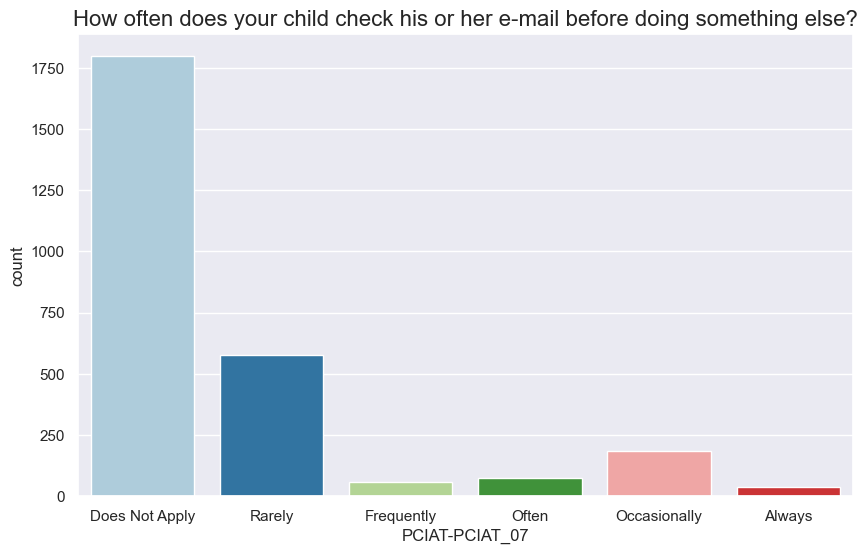

In [133]:
train['PCIAT-PCIAT_07'] = train['PCIAT-PCIAT_07'].map({
    0: "Does Not Apply", 
    1: "Rarely", 
    2: "Occasionally", 
    3: "Frequently", 
    4: "Often", 
    5: "Always"
})
plt.figure(figsize=(10,6))
sns.countplot(train, x='PCIAT-PCIAT_07', width=0.8, palette='Paired')
plt.title("How often does your child check his or her e-mail before doing something else?", fontsize=16) 

/var/folders/w2/t627t88j5nsfjtdlp6wzcfz40000gn/T/ipykernel_72826/1331228628.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(train, x='PCIAT-PCIAT_08', width=0.8, palette='Paired')


Text(0.5, 1.0, 'How often does your child seem withdrawn from others since discovering the Internet?')

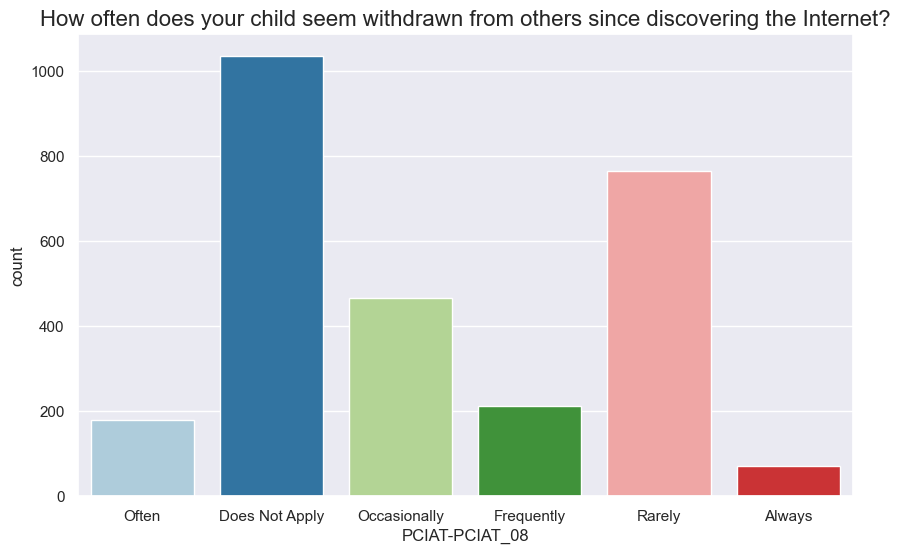

In [134]:
train['PCIAT-PCIAT_08'] = train['PCIAT-PCIAT_08'].map({
    0: "Does Not Apply", 
    1: "Rarely", 
    2: "Occasionally", 
    3: "Frequently", 
    4: "Often", 
    5: "Always"
})
plt.figure(figsize=(10,6))
sns.countplot(train, x='PCIAT-PCIAT_08', width=0.8, palette='Paired')
plt.title("How often does your child seem withdrawn from others since discovering the Internet?", fontsize=16) 

/var/folders/w2/t627t88j5nsfjtdlp6wzcfz40000gn/T/ipykernel_72826/2792473901.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(train, x='PCIAT-PCIAT_09', width=0.8, palette='Paired')


Text(0.5, 1.0, 'How often does your child become defensive or secretive when asked what he or she does online?')

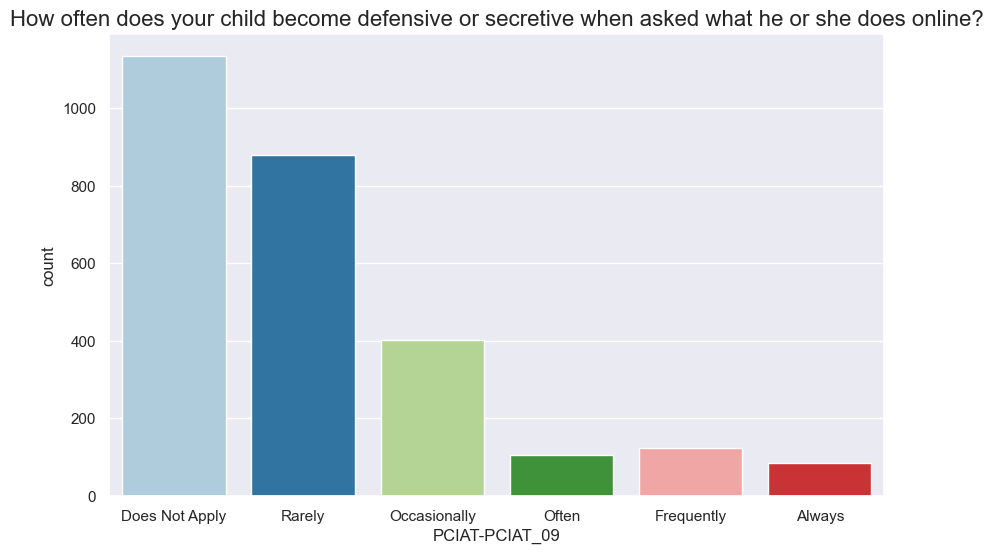

In [135]:
train['PCIAT-PCIAT_09'] = train['PCIAT-PCIAT_09'].map({
    0: "Does Not Apply", 
    1: "Rarely", 
    2: "Occasionally", 
    3: "Frequently", 
    4: "Often", 
    5: "Always"
})
plt.figure(figsize=(10,6))
sns.countplot(train, x='PCIAT-PCIAT_09', width=0.8, palette='Paired')
plt.title("How often does your child become defensive or secretive when asked what he or she does online?", fontsize=16) 

/var/folders/w2/t627t88j5nsfjtdlp6wzcfz40000gn/T/ipykernel_72826/2693318992.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(train, x='PCIAT-PCIAT_10', width=0.8, palette='Paired')


Text(0.5, 1.0, 'How often have you caught your child sneaking online against your wishes?')

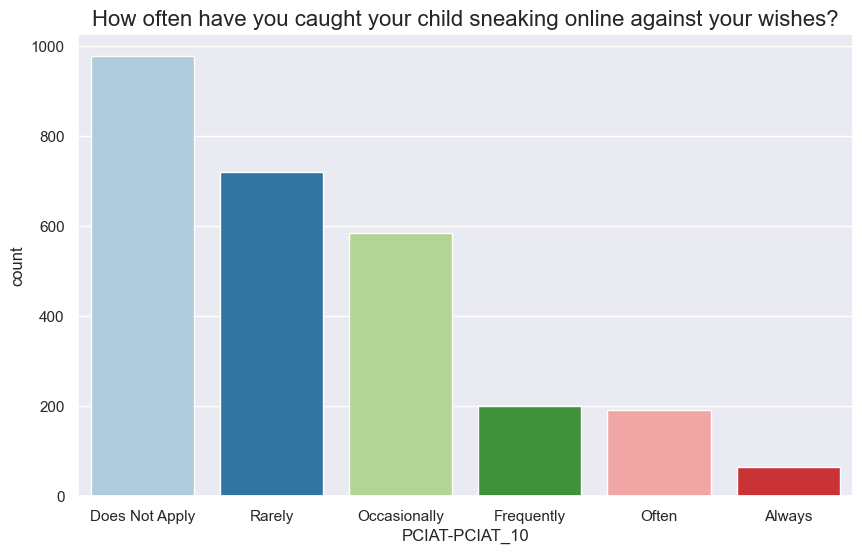

In [136]:
train['PCIAT-PCIAT_10'] = train['PCIAT-PCIAT_10'].map({
    0: "Does Not Apply", 
    1: "Rarely", 
    2: "Occasionally", 
    3: "Frequently", 
    4: "Often", 
    5: "Always"
})
plt.figure(figsize=(10,6))
sns.countplot(train, x='PCIAT-PCIAT_10', width=0.8, palette='Paired')
plt.title("How often have you caught your child sneaking online against your wishes?", fontsize=16) 

/var/folders/w2/t627t88j5nsfjtdlp6wzcfz40000gn/T/ipykernel_72826/1827313122.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(train, x='PCIAT-PCIAT_11', width=0.8, palette='Paired')


Text(0.5, 1.0, 'How often does your child spend time along in his or her room playing on the computer?')

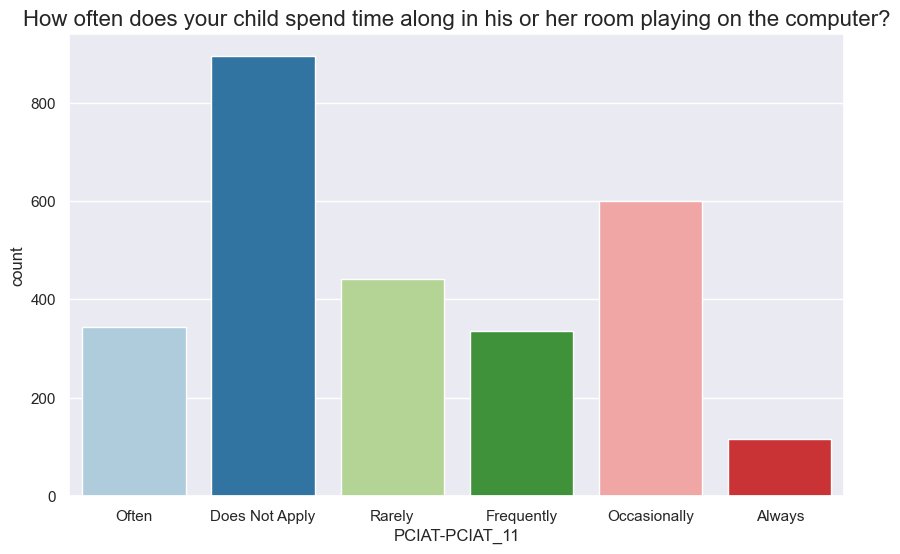

In [137]:
train['PCIAT-PCIAT_11'] = train['PCIAT-PCIAT_11'].map({
    0: "Does Not Apply", 
    1: "Rarely", 
    2: "Occasionally", 
    3: "Frequently", 
    4: "Often", 
    5: "Always"
})
plt.figure(figsize=(10,6))
sns.countplot(train, x='PCIAT-PCIAT_11', width=0.8, palette='Paired')
plt.title("How often does your child spend time along in his or her room playing on the computer?", fontsize=16) 

/var/folders/w2/t627t88j5nsfjtdlp6wzcfz40000gn/T/ipykernel_72826/828749310.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(train, x='PCIAT-PCIAT_12', width=0.8, palette='Paired')


Text(0.5, 1.0, 'How often does your child receive strange phone calls from new online friends?')

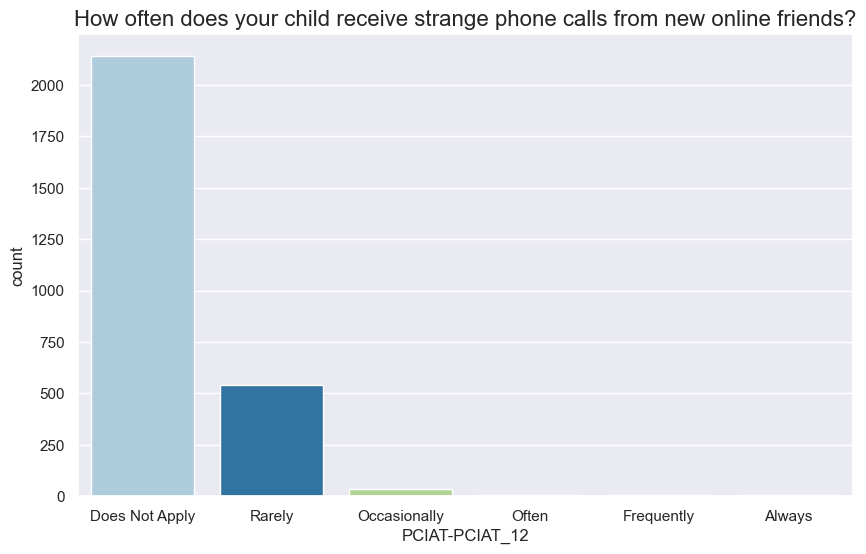

In [138]:
train['PCIAT-PCIAT_12'] = train['PCIAT-PCIAT_12'].map({
    0: "Does Not Apply", 
    1: "Rarely", 
    2: "Occasionally", 
    3: "Frequently", 
    4: "Often", 
    5: "Always"
})
plt.figure(figsize=(10,6))
sns.countplot(train, x='PCIAT-PCIAT_12', width=0.8, palette='Paired')
plt.title("How often does your child receive strange phone calls from new ""online"" friends?", fontsize=16) 

/var/folders/w2/t627t88j5nsfjtdlp6wzcfz40000gn/T/ipykernel_72826/2313221371.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(train, x='PCIAT-PCIAT_13', width=0.8, palette='Paired')


Text(0.5, 1.0, 'How often does your child snap, yell, or act annoyed if bothered while online?')

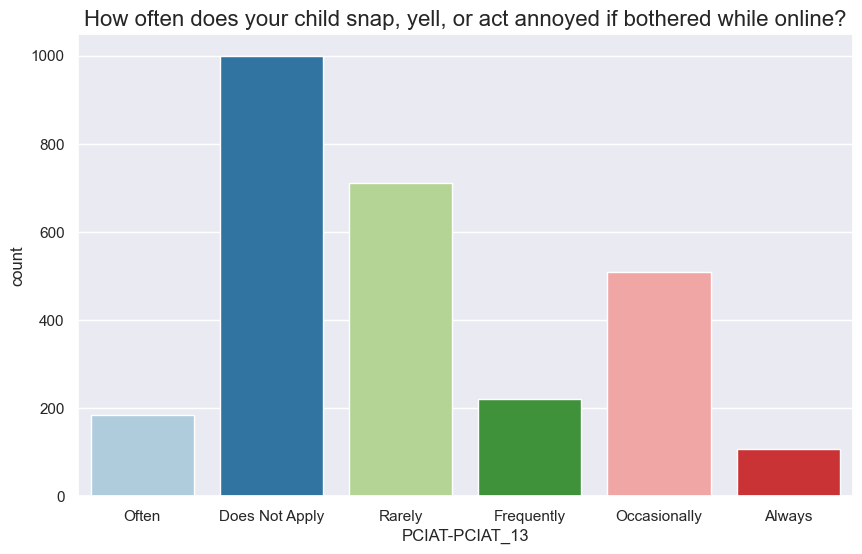

In [139]:
train['PCIAT-PCIAT_13'] = train['PCIAT-PCIAT_13'].map({
    0: "Does Not Apply", 
    1: "Rarely", 
    2: "Occasionally", 
    3: "Frequently", 
    4: "Often", 
    5: "Always"
})
plt.figure(figsize=(10,6))
sns.countplot(train, x='PCIAT-PCIAT_13', width=0.8, palette='Paired')
plt.title("How often does your child snap, yell, or act annoyed if bothered while online?", fontsize=16) 

/var/folders/w2/t627t88j5nsfjtdlp6wzcfz40000gn/T/ipykernel_72826/3537236994.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(train, x='PCIAT-PCIAT_14', width=0.8, palette='Paired')


Text(0.5, 1.0, 'How often does your child seem more tired and fatigued than he or she did before the Internet came along?')

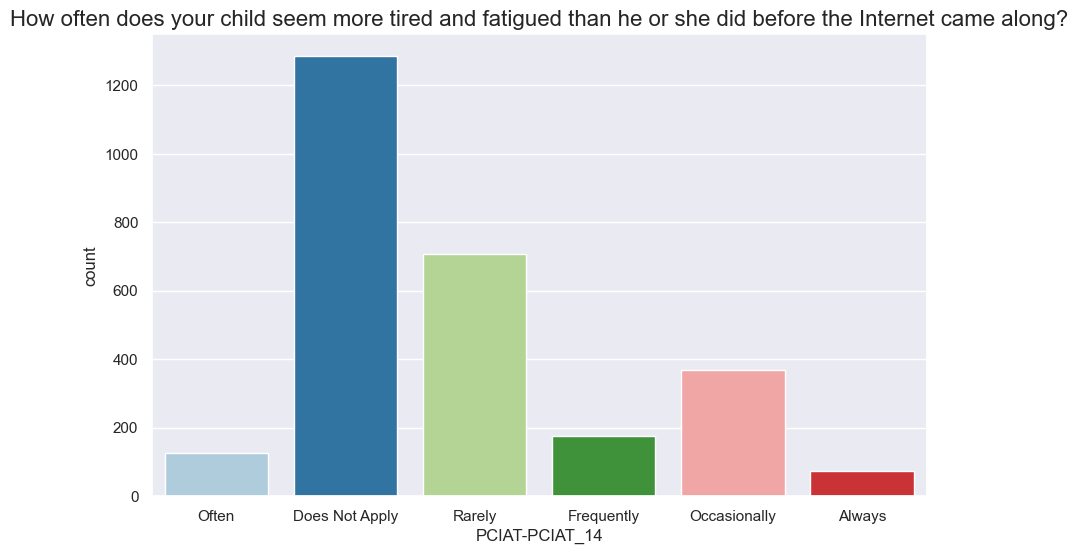

In [140]:
train['PCIAT-PCIAT_14'] = train['PCIAT-PCIAT_14'].map({
    0: "Does Not Apply", 
    1: "Rarely", 
    2: "Occasionally", 
    3: "Frequently", 
    4: "Often", 
    5: "Always"
})
plt.figure(figsize=(10,6))
sns.countplot(train, x='PCIAT-PCIAT_14', width=0.8, palette='Paired')
plt.title("How often does your child seem more tired and fatigued than he or she did before the Internet came along?", fontsize=16) 

/var/folders/w2/t627t88j5nsfjtdlp6wzcfz40000gn/T/ipykernel_72826/974148152.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(train, x='PCIAT-PCIAT_15', width=0.8, palette='Paired')


Text(0.5, 1.0, 'How often does your child seem preoccupied with being back online when off-line?')

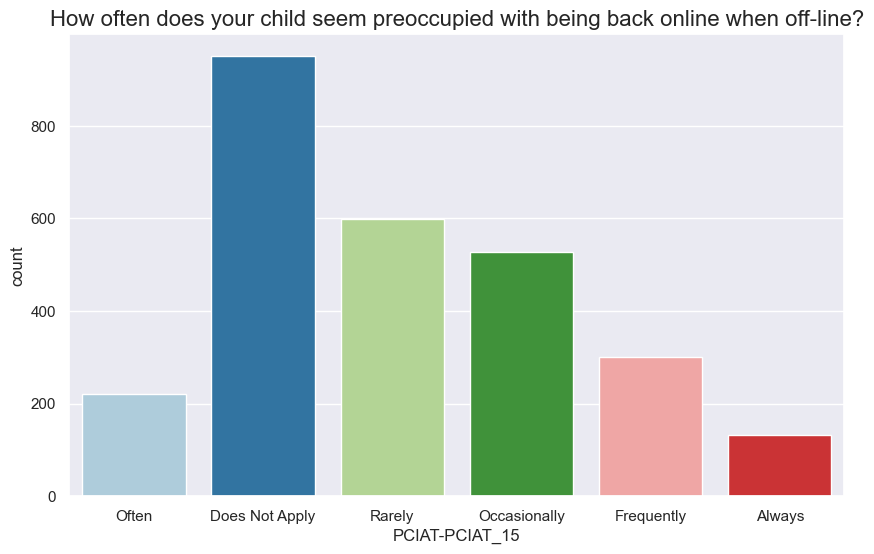

In [141]:
train['PCIAT-PCIAT_15'] = train['PCIAT-PCIAT_15'].map({
    0: "Does Not Apply", 
    1: "Rarely", 
    2: "Occasionally", 
    3: "Frequently", 
    4: "Often", 
    5: "Always"
})
plt.figure(figsize=(10,6))
sns.countplot(train, x='PCIAT-PCIAT_15', width=0.8, palette='Paired')
plt.title("How often does your child seem preoccupied with being back online when off-line?", fontsize=16) 

/var/folders/w2/t627t88j5nsfjtdlp6wzcfz40000gn/T/ipykernel_72826/2745912126.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(train, x='PCIAT-PCIAT_16', width=0.8, palette='Paired')


Text(0.5, 1.0, 'How often does your child throw tantrums with your interference about how long he or she spends online?')

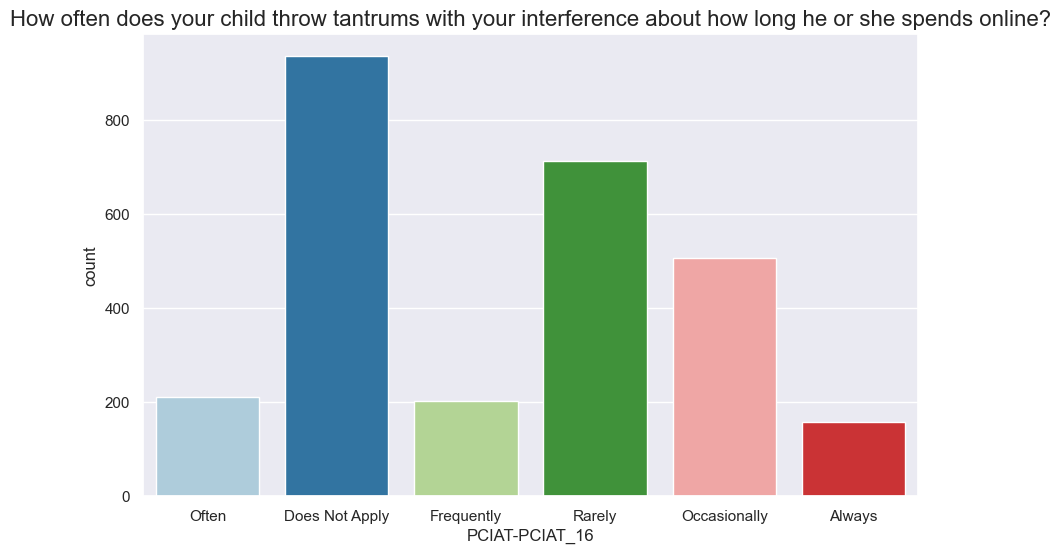

In [142]:
train['PCIAT-PCIAT_16'] = train['PCIAT-PCIAT_16'].map({
    0: "Does Not Apply", 
    1: "Rarely", 
    2: "Occasionally", 
    3: "Frequently", 
    4: "Often", 
    5: "Always"
})
plt.figure(figsize=(10,6))
sns.countplot(train, x='PCIAT-PCIAT_16', width=0.8, palette='Paired')
plt.title("How often does your child throw tantrums with your interference about how long he or she spends online?", fontsize=16) 

/var/folders/w2/t627t88j5nsfjtdlp6wzcfz40000gn/T/ipykernel_72826/2263261265.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(train, x='PCIAT-PCIAT_17', width=0.8, palette='Paired')


Text(0.5, 1.0, 'How often does your child choose to spend time online rather than doing once enjoyed hobbies and/or outside interests?')

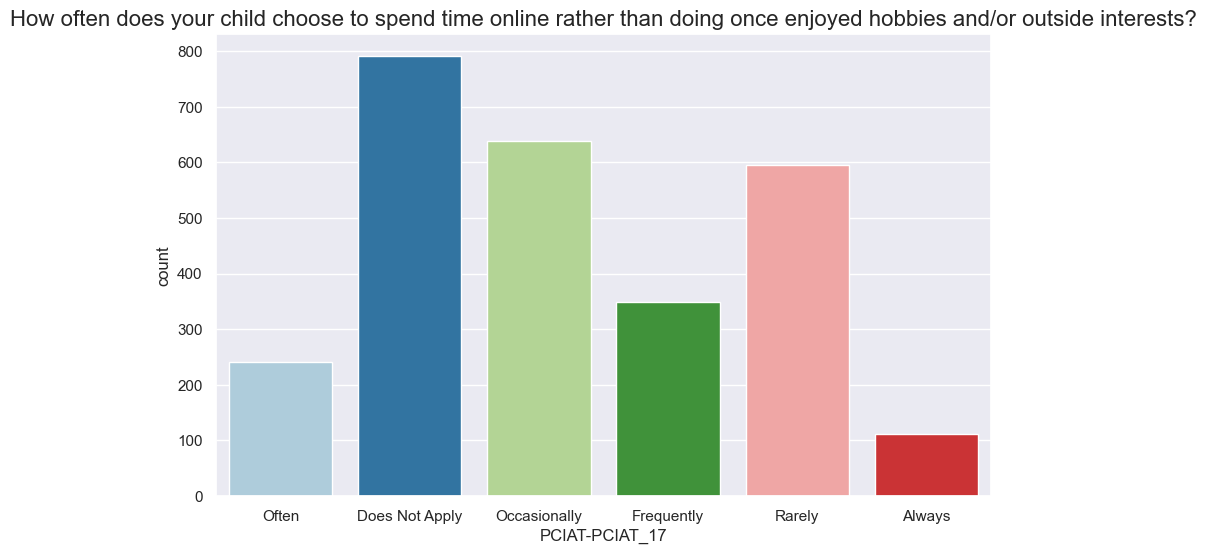

In [143]:
train['PCIAT-PCIAT_17'] = train['PCIAT-PCIAT_17'].map({
    0: "Does Not Apply", 
    1: "Rarely", 
    2: "Occasionally", 
    3: "Frequently", 
    4: "Often", 
    5: "Always"
})
plt.figure(figsize=(10,6))
sns.countplot(train, x='PCIAT-PCIAT_17', width=0.8, palette='Paired')
plt.title("How often does your child choose to spend time online rather than doing once enjoyed hobbies and/or outside interests?", fontsize=16) 

/var/folders/w2/t627t88j5nsfjtdlp6wzcfz40000gn/T/ipykernel_72826/1651608873.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(train, x='PCIAT-PCIAT_18', width=0.8, palette='Paired')


Text(0.5, 1.0, 'How often does your child become angry or belligerent when your place time limits on how much time he or shes is allowed to spend online?')

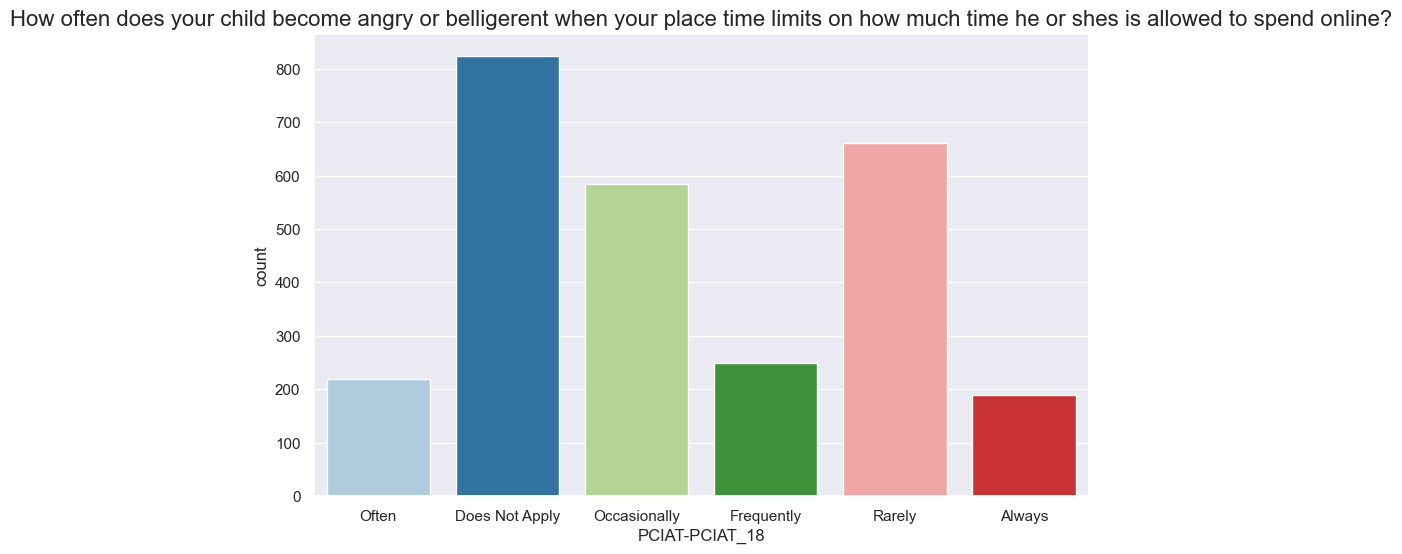

In [144]:
train['PCIAT-PCIAT_18'] = train['PCIAT-PCIAT_18'].map({
    0: "Does Not Apply", 
    1: "Rarely", 
    2: "Occasionally", 
    3: "Frequently", 
    4: "Often", 
    5: "Always"
})
plt.figure(figsize=(10,6))
sns.countplot(train, x='PCIAT-PCIAT_18', width=0.8, palette='Paired')
plt.title("How often does your child become angry or belligerent when your place time limits on how much time he or shes is allowed to spend online?", fontsize=16) 

/var/folders/w2/t627t88j5nsfjtdlp6wzcfz40000gn/T/ipykernel_72826/1142592762.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(train, x='PCIAT-PCIAT_19', width=0.8, palette='Paired')


Text(0.5, 1.0, 'How often does your child choose to spend more time online than going out with friends?')

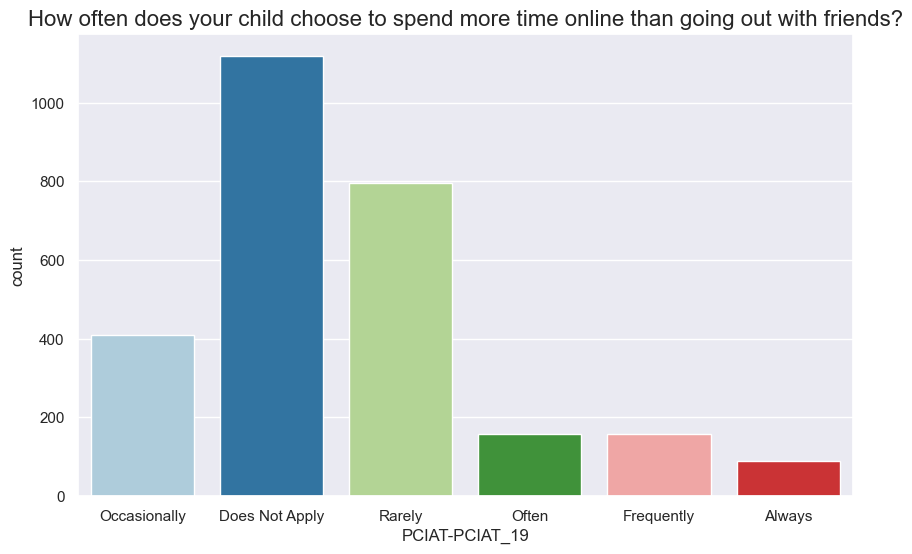

In [145]:
train['PCIAT-PCIAT_19'] = train['PCIAT-PCIAT_19'].map({
    0: "Does Not Apply", 
    1: "Rarely", 
    2: "Occasionally", 
    3: "Frequently", 
    4: "Often", 
    5: "Always"
})
plt.figure(figsize=(10,6))
sns.countplot(train, x='PCIAT-PCIAT_19', width=0.8, palette='Paired')
plt.title("How often does your child choose to spend more time online than going out with friends?", fontsize=16) 

/var/folders/w2/t627t88j5nsfjtdlp6wzcfz40000gn/T/ipykernel_72826/319144222.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(train, x='PCIAT-PCIAT_20', width=0.8, palette='Paired')


Text(0.5, 1.0, 'How often does your child feel depressed, moody, or nervous when off-line which seems to go away once back online?')

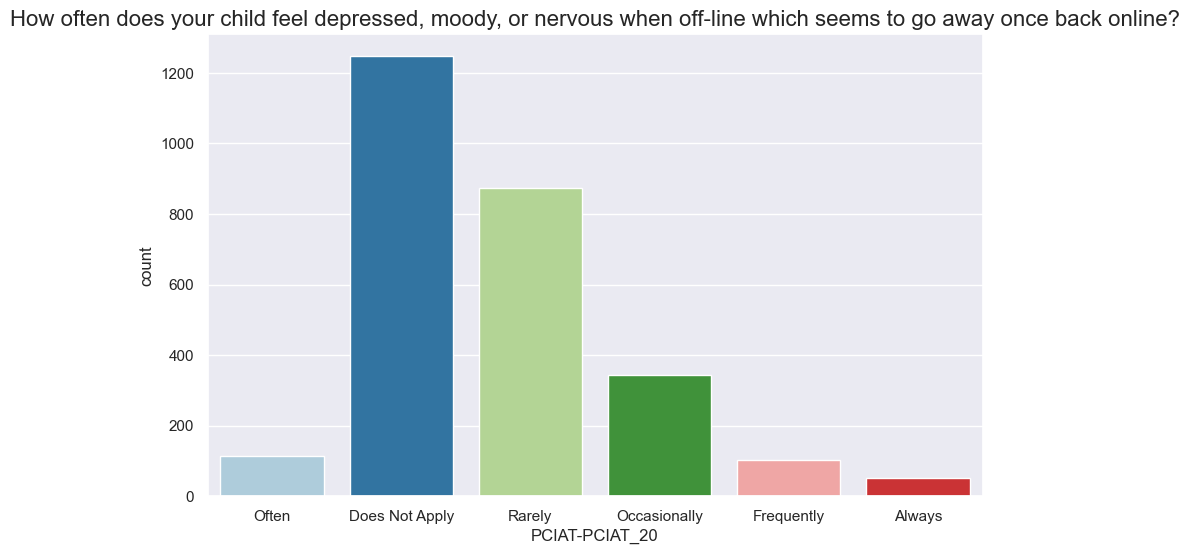

In [146]:
train['PCIAT-PCIAT_20'] = train['PCIAT-PCIAT_20'].map({
    0: "Does Not Apply", 
    1: "Rarely", 
    2: "Occasionally", 
    3: "Frequently", 
    4: "Often", 
    5: "Always"
})
plt.figure(figsize=(10,6))
sns.countplot(train, x='PCIAT-PCIAT_20', width=0.8, palette='Paired')
plt.title("How often does your child feel depressed, moody, or nervous when off-line which seems to go away once back online?", fontsize=16) 

/var/folders/w2/t627t88j5nsfjtdlp6wzcfz40000gn/T/ipykernel_72826/1512330749.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(train, x='PreInt_EduHx-computerinternet_hoursday', width=0.8, palette='Paired')


Text(0.5, 1.0, 'Internet Usage Hours')

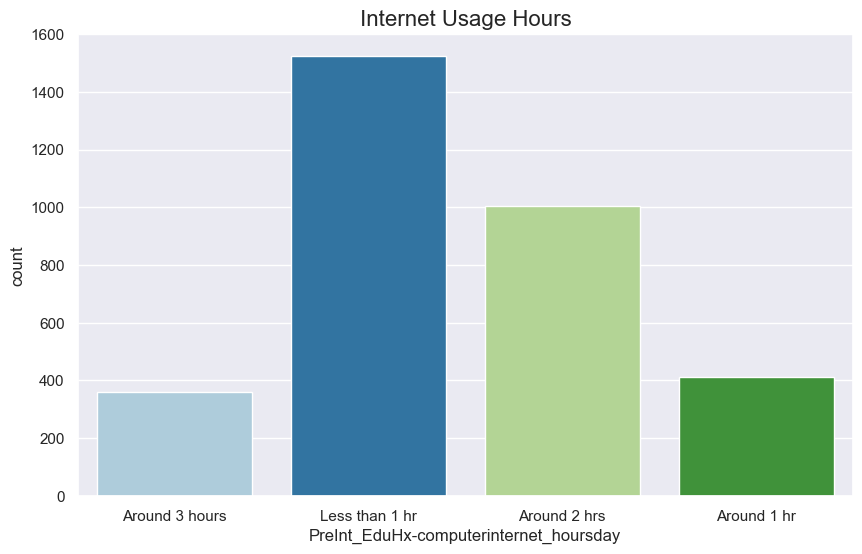

In [147]:
train['PreInt_EduHx-computerinternet_hoursday'] = train['PreInt_EduHx-computerinternet_hoursday'].map({
    0: "Less than 1 hr", 
    1: "Around 1 hr", 
    2: "Around 2 hrs", 
    3: "Around 3 hours"
})
plt.figure(figsize=(10,6))
sns.countplot(train, x='PreInt_EduHx-computerinternet_hoursday', width=0.8, palette='Paired')
plt.title("Internet Usage Hours", fontsize=16) 

<Figure size 1000x600 with 0 Axes>

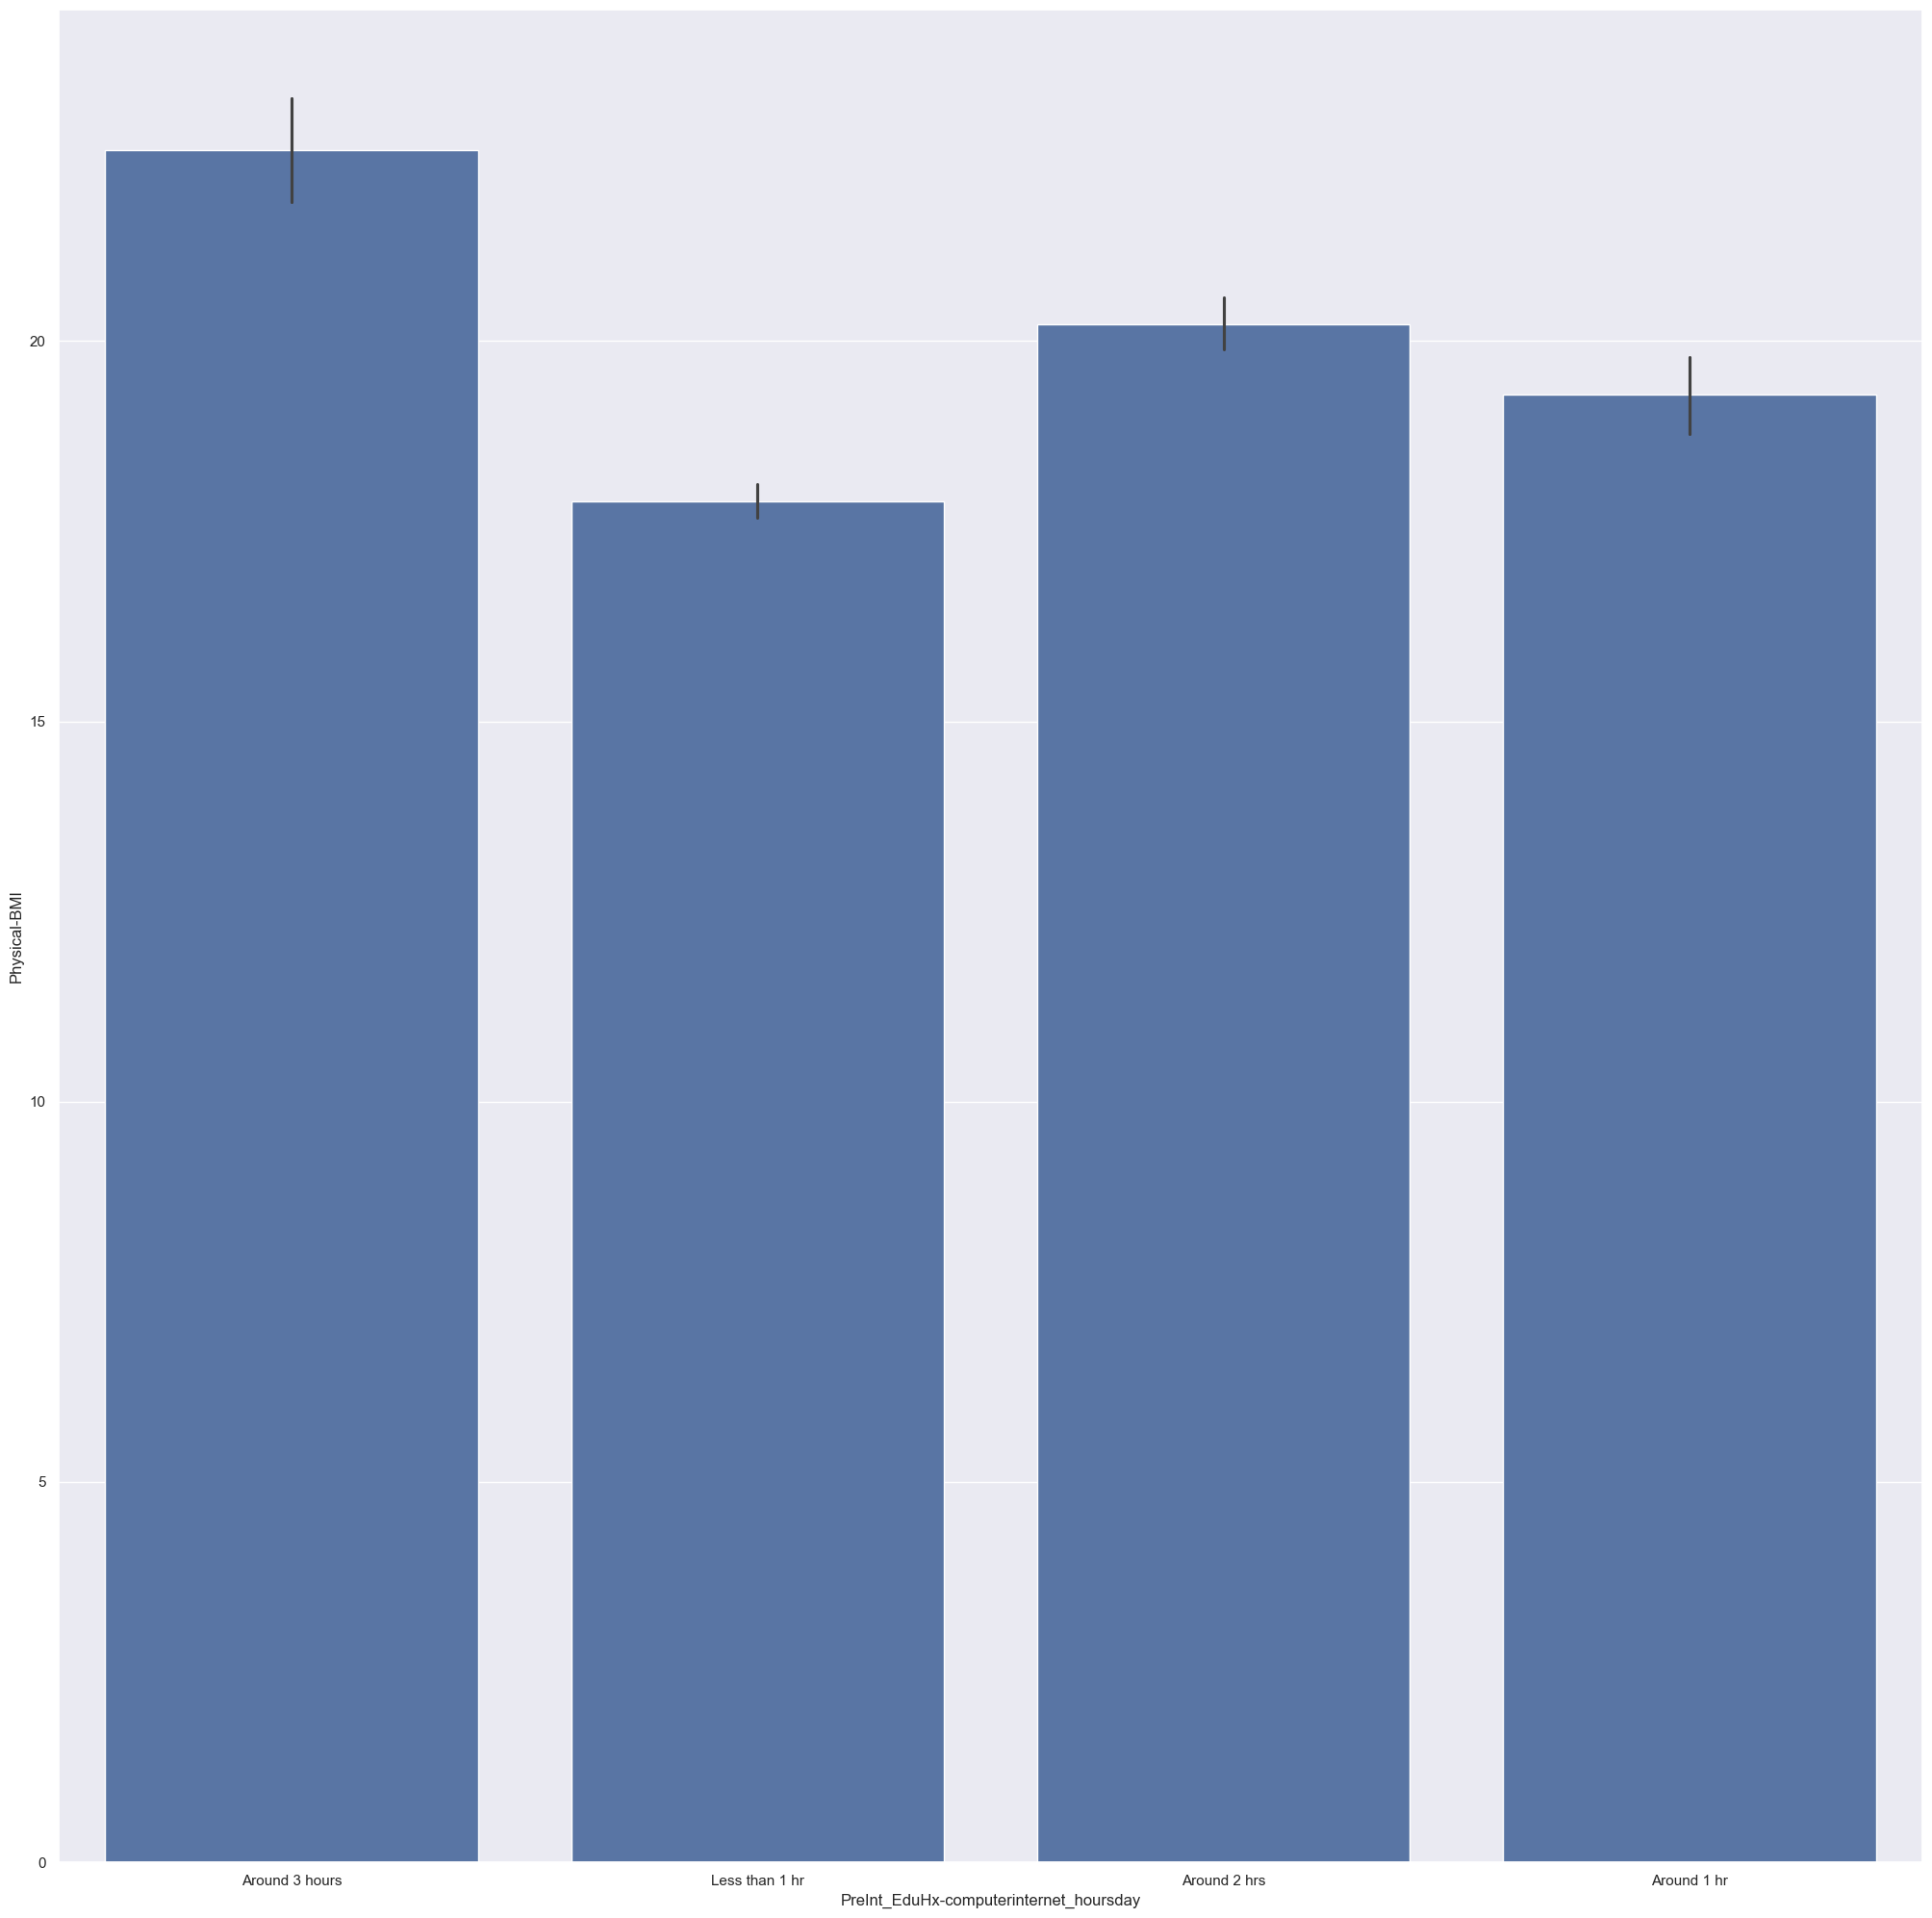

<Figure size 1000x600 with 0 Axes>

In [148]:
sns.barplot(train, x="PreInt_EduHx-computerinternet_hoursday",y="Physical-BMI")
plt.figure(figsize=(10,6))

In [149]:
# Iterate through the columns and calculate the missing ratio
for column in train.columns:
    # Total count and missing count for the current column
    total = len(train[column])
    missing = train[column].isna().sum()
    
    # Calculate the missing ratio
    missing_ratio = missing / total
    
    # Print the result
    print(f"Column: {column}, Missing Ratio: {missing_ratio:.2f}%")


Column: id, Missing Ratio: 0.00%
Column: Basic_Demos-Enroll_Season, Missing Ratio: 0.00%
Column: Basic_Demos-Age, Missing Ratio: 0.00%
Column: Basic_Demos-Sex, Missing Ratio: 0.00%
Column: CGAS-Season, Missing Ratio: 0.35%
Column: CGAS-CGAS_Score, Missing Ratio: 0.39%
Column: Physical-Season, Missing Ratio: 0.16%
Column: Physical-BMI, Missing Ratio: 0.24%
Column: Physical-Height, Missing Ratio: 0.24%
Column: Physical-Weight, Missing Ratio: 0.22%
Column: Physical-Waist_Circumference, Missing Ratio: 0.77%
Column: Physical-Diastolic_BP, Missing Ratio: 0.25%
Column: Physical-HeartRate, Missing Ratio: 0.25%
Column: Physical-Systolic_BP, Missing Ratio: 0.25%
Column: Fitness_Endurance-Season, Missing Ratio: 0.67%
Column: Fitness_Endurance-Max_Stage, Missing Ratio: 0.81%
Column: Fitness_Endurance-Time_Mins, Missing Ratio: 0.81%
Column: Fitness_Endurance-Time_Sec, Missing Ratio: 0.81%
Column: FGC-Season, Missing Ratio: 0.16%
Column: FGC-FGC_CU, Missing Ratio: 0.41%
Column: FGC-FGC_CU_Zone, Miss

In [150]:
for column in bia_df.columns:
    # Total count and missing count for the current column
    total = len(train[column])
    missing = train[column].isna().sum()
    
    # Calculate the missing ratio
    missing_ratio = missing / total
    
    # Print the result
    print(f"Column: {column}, Missing Ratio: {missing_ratio:.2f}%")

Column: BIA-BIA_Activity_Level_num, Missing Ratio: 0.50%
Column: BIA-BIA_BMC, Missing Ratio: 0.50%
Column: BIA-BIA_BMI, Missing Ratio: 0.50%
Column: BIA-BIA_BMR, Missing Ratio: 0.50%
Column: BIA-BIA_DEE, Missing Ratio: 0.50%
Column: BIA-BIA_ECW, Missing Ratio: 0.50%
Column: BIA-BIA_FFM, Missing Ratio: 0.50%
Column: BIA-BIA_FFMI, Missing Ratio: 0.50%
Column: BIA-BIA_FMI, Missing Ratio: 0.50%
Column: BIA-BIA_Fat, Missing Ratio: 0.50%
Column: BIA-BIA_Frame_num, Missing Ratio: 0.50%
Column: BIA-BIA_ICW, Missing Ratio: 0.50%
Column: BIA-BIA_LDM, Missing Ratio: 0.50%
Column: BIA-BIA_LST, Missing Ratio: 0.50%
Column: BIA-BIA_SMM, Missing Ratio: 0.50%
Column: BIA-BIA_TBW, Missing Ratio: 0.50%


In [151]:
pciat_ = ['PCIAT-Season', 'PCIAT-PCIAT_01', 'PCIAT-PCIAT_02',
       'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06',
       'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10',
       'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14',
       'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18',
       'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20', 'PCIAT-PCIAT_Total']

PCIAT_df = train[pciat_]

for column in PCIAT_df:
    total = len(train[column])
    missing = train[column].isna().sum()
    
    # Calculate the missing ratio
    missing_ratio = missing / total
    
    # Print the result
    print(f"Column: {column}, Missing Ratio: {missing_ratio:.2f}%")
    

Column: PCIAT-Season, Missing Ratio: 0.31%
Column: PCIAT-PCIAT_01, Missing Ratio: 0.31%
Column: PCIAT-PCIAT_02, Missing Ratio: 0.31%
Column: PCIAT-PCIAT_03, Missing Ratio: 0.31%
Column: PCIAT-PCIAT_04, Missing Ratio: 0.31%
Column: PCIAT-PCIAT_05, Missing Ratio: 0.31%
Column: PCIAT-PCIAT_06, Missing Ratio: 0.31%
Column: PCIAT-PCIAT_07, Missing Ratio: 0.31%
Column: PCIAT-PCIAT_08, Missing Ratio: 0.31%
Column: PCIAT-PCIAT_09, Missing Ratio: 0.31%
Column: PCIAT-PCIAT_10, Missing Ratio: 0.31%
Column: PCIAT-PCIAT_11, Missing Ratio: 0.31%
Column: PCIAT-PCIAT_12, Missing Ratio: 0.31%
Column: PCIAT-PCIAT_13, Missing Ratio: 0.31%
Column: PCIAT-PCIAT_14, Missing Ratio: 0.31%
Column: PCIAT-PCIAT_15, Missing Ratio: 0.31%
Column: PCIAT-PCIAT_16, Missing Ratio: 0.31%
Column: PCIAT-PCIAT_17, Missing Ratio: 0.31%
Column: PCIAT-PCIAT_18, Missing Ratio: 0.31%
Column: PCIAT-PCIAT_19, Missing Ratio: 0.31%
Column: PCIAT-PCIAT_20, Missing Ratio: 0.31%
Column: PCIAT-PCIAT_Total, Missing Ratio: 0.31%


In [152]:
fgc_ = ['FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone']
fgc_df = train[fgc_]

for column in fgc_df:
    total = len(train[column])
    missing = train[column].isna().sum()
    
    # Calculate the missing ratio
    missing_ratio = missing / total
    
    # Print the result
    print(f"Column: {column}, Missing Ratio: {missing_ratio:.2f}%")

Column: FGC-Season, Missing Ratio: 0.16%
Column: FGC-FGC_CU, Missing Ratio: 0.41%
Column: FGC-FGC_CU_Zone, Missing Ratio: 0.42%
Column: FGC-FGC_GSND, Missing Ratio: 0.73%
Column: FGC-FGC_GSND_Zone, Missing Ratio: 0.73%
Column: FGC-FGC_GSD, Missing Ratio: 0.73%
Column: FGC-FGC_GSD_Zone, Missing Ratio: 0.73%
Column: FGC-FGC_PU, Missing Ratio: 0.42%
Column: FGC-FGC_PU_Zone, Missing Ratio: 0.43%
Column: FGC-FGC_SRL, Missing Ratio: 0.42%
Column: FGC-FGC_SRL_Zone, Missing Ratio: 0.43%
Column: FGC-FGC_SRR, Missing Ratio: 0.42%
Column: FGC-FGC_SRR_Zone, Missing Ratio: 0.43%
Column: FGC-FGC_TL, Missing Ratio: 0.41%
Column: FGC-FGC_TL_Zone, Missing Ratio: 0.42%
